# Introdução e Contextualização


## Objetivo

O canal **Gastronomades** é um canal pessoal, é dedicado a compartilhar experiências de viagens, roteiros gastronômicos e dicas culturais, buscando engajar uma comunidade apaixonada por explorar novos lugares e sabores.
<br><br><br>

A análise detalhada do desempenho histórico dos vídeos é fundamental para entender o que gera mais valor para o público e para o próprio crescimento do canal. Ao identificar padrões de sucesso — como tipos de vídeos que atraem mais visualizações, inscritos, receita e engajamento — é possível otimizar estratégias de conteúdo, melhorar a performance de vídeos futuros e, assim, potencializar a retenção e a expansão da audiência.
<br><br><br>

Trata-se de um problema de aprendizado não supervisionado, uma vez que não temos nenhuma informação quanto à classificação prévia dos vídeos e é de interesse conseguir categorizar os vídeos entre bons, medianos e ruins de acordo com as estatísticas.

## Conjunto de dados


O dataset utilizado neste MVP contém métricas históricas de **vídeos longos**, acumuladas desde a criação do canal até o momento atual. Cada linha do dataset representa um vídeo, trazendo informações como data de publicação, duração, visualizações, inscritos ganhos, etc.    
<br><br>
Optou-se por **excluir os vídeos do formato *Shorts***, pois possuem dinâmica e métricas específicas que diferem dos vídeos longos — o que poderia distorcer a análise comparativa. Assim, o foco recai sobre o conteúdo de maior duração, que costuma gerar maior retenção e receita por visualização, permitindo investigar quais características mais contribuem para o sucesso do canal no longo prazo.
<br><br>

Descrição dos atributos do conjunto de dados:

- **Horário de publicação do vídeo:** data/hora de publicação
- **Duração:** duração total do vídeo em segundos/minutos
- **Tempo de exibição (horas):** tempo tempo total de horas de visualização
- **Inscritos:** número total de inscritos do canal
- **Inscrições obtidas:** quantos inscritos foram ganhos pelo vídeo
- **Inscrições perdidas:** quantos inscritos foram perdidos após assistir o vídeo
- **Marcações "Gostei"/"Não gostei":** interações de likes e dislikes
- **"Gostei" (vs. "Não gostei") (%):** proporção
- **Compartilhamentos:** total de vezes que o vídeo foi compartilhado
- **Comentários adicionados:** total de comentários feitos no vídeo
- **Receita estimada (USD):** receita gerada
- **RPM (USD):** receita por mil impressões
- **Visualizações:** total de views do vídeo
- **Impressões:** total de impressões
- **Taxa de cliques de impressões (%):** CTR
- **Duração média da visualização:** tempo médio assistido

## Hipóteses


São hipóteses do problema:

- Vídeos com mais views tendem a trazer mais inscritos e receita.
- Vídeos mais longos podem ter maior duração média de visualização.
- Alta CTR pode indicar título/capa mais atrativos.
- Compartilhamentos e comentários podem indicar engajamento mais profundo.

## Bibliotecas


In [99]:
import pandas as pd
from datetime import datetime #converte uma coluna em formato datetime
import matplotlib.pyplot as plt
import seaborn as sns


## Input dos dados


In [100]:
# Carga dos dados

#Analytics


#raw
url_1 = "https://raw.githubusercontent.com/nathaliaverissimo/PUC-RIO/742513f1078a782654d3729a376c70d2b2062f81/gastronomades_analytics__jun2025.xlsx"
raw__gastronomades_jun2025 = pd.read_excel(url_1,sheet_name="Dados da tabela")
raw__gastronomades_jun2025.head(3)

#upload

#raw__gastronomades_jun2025 = pd.read_excel('gastronomades_analytics__jun2025.xlsx', engine='openpyxl')
#raw__gastronomades_jun2025.head(3)

,Conteúdo,Título do vídeo,Horário de publicação do vídeo,Duração,Tempo de exibição (horas),Inscritos,Inscrições obtidas,Inscrições perdidas,"Marcações ""Gostei""","Marcações ""Não gostei""","""Gostei"" (vs. ""Não gostei"") (%)",Compartilhamentos,Comentários adicionados,Receita estimada (USD),RPM (USD),Visualizações,Impressões,Taxa de cliques de impressões (%),Duração média da visualização
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,"Oct 13, 2024",2120,5343.0193,363,370,7,796,25,96.95,255,15,52.735,1.658,31933,515258,3.92,0:10:02
1,R5zvHCL4uv4,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,"Jan 12, 2025",2042,2128.7062,70,73,3,275,6,97.86,83,15,20.755,1.864,11215,132731,5.69,0:11:23
2,xKyysw_ic0c,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,"Nov 5, 2022",1455,1495.6786,103,107,4,333,12,96.52,90,10,0.797,0.049,16300,253246,4.42,0:05:30


In [101]:
# Carga dos dados

#Playlists

#raw
url_2 = "https://raw.githubusercontent.com/nathaliaverissimo/PUC-RIO/742513f1078a782654d3729a376c70d2b2062f81/gastronomades_playlists.xlsx"
raw__gastronomades_playlists = pd.read_excel(url_2,sheet_name="Planilha1")
raw__gastronomades_playlists.head(3)



#upload
#raw__gastronomades_playlists = pd.read_excel('gastronomades_playlists.xlsx', engine='openpyxl')
#raw__gastronomades_playlists.head(3)



#Merge para adicionar a coluna de Playlist no dataset original
raw__gastronomades_jun2025 = raw__gastronomades_jun2025.merge(raw__gastronomades_playlists, left_on = 'Conteúdo', right_on = 'Conteúdo', how='left')
raw__gastronomades_jun2025.head(3)

,Conteúdo,Título do vídeo_x,Horário de publicação do vídeo,Duração,Tempo de exibição (horas),Inscritos,Inscrições obtidas,Inscrições perdidas,"Marcações ""Gostei""","Marcações ""Não gostei""",...,Compartilhamentos,Comentários adicionados,Receita estimada (USD),RPM (USD),Visualizações,Impressões,Taxa de cliques de impressões (%),Duração média da visualização,Título do vídeo_y,Playlist
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,"Oct 13, 2024",2120,5343.0193,363,370,7,796,25,...,255,15,52.735,1.658,31933,515258,3.92,0:10:02,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,Paraná
1,R5zvHCL4uv4,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,"Jan 12, 2025",2042,2128.7062,70,73,3,275,6,...,83,15,20.755,1.864,11215,132731,5.69,0:11:23,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,Alagoas
2,xKyysw_ic0c,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,"Nov 5, 2022",1455,1495.6786,103,107,4,333,12,...,90,10,0.797,0.049,16300,253246,4.42,0:05:30,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,Rio de Janeiro


# Pré-processamento de dados


## Overview

In [102]:
# dimensão do dataset (linhas,colunas)

raw__gastronomades_jun2025.shape

(84, 21)

In [103]:
# estatísticas gerais do dataset
raw__gastronomades_jun2025.describe()

,Duração,Tempo de exibição (horas),Inscritos,Inscrições obtidas,Inscrições perdidas,"Marcações ""Gostei""","Marcações ""Não gostei""","""Gostei"" (vs. ""Não gostei"") (%)",Compartilhamentos,Comentários adicionados,Receita estimada (USD),RPM (USD),Visualizações,Impressões,Taxa de cliques de impressões (%)
count,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,81.000000,81.000000,84.000000,84.000000,84.000000
mean,914.928571,295.190935,24.25000,24.738095,0.488095,89.428571,1.809524,98.520357,59.154762,6.023810,4.088309,1.260617,3305.297619,31346.416667,6.401548
std,650.972503,663.166377,46.01437,46.958356,1.145910,118.234022,4.198325,2.249685,89.620820,4.552177,7.291229,0.717330,5201.058149,66740.531607,2.855186
min,123.000000,0.913700,0.00000,0.000000,0.000000,3.000000,0.000000,88.700000,0.000000,0.000000,0.035000,0.049000,64.000000,570.000000,1.400000
25%,490.750000,40.705575,4.00000,4.000000,0.000000,25.750000,0.000000,97.840000,9.000000,3.000000,0.697000,0.647000,662.750000,5283.000000,4.352500
50%,805.000000,101.795100,8.50000,9.000000,0.000000,43.000000,0.000000,100.000000,24.500000,5.000000,1.466000,1.131000,1404.000000,10743.000000,5.860000
75%,1123.000000,275.686600,25.00000,25.000000,1.000000,95.500000,2.000000,100.000000,69.750000,8.250000,4.067000,1.862000,2872.750000,27692.250000,8.852500
max,4140.000000,5343.019300,363.00000,370.000000,7.000000,796.000000,26.000000,100.000000,567.000000,21.000000,52.735000,3.707000,31933.000000,515258.000000,13.260000


## Seleção/Organização das Colunas

In [104]:
# Define o nome das colunas do dataset
columns_name = {
    'Conteúdo': 'content_id',
    'Título do vídeo_x': 'content_name',
    'Horário de publicação do vídeo': 'publish_date',
    'Duração': 'duration__ss',
    'Tempo de exibição (horas)':'watch_time__hh',
    'Inscritos': 'subscribers',
    'Inscrições obtidas': 'gained_subscribers',
    'Inscrições perdidas': 'lost_subscribers',
    'Marcações "Gostei"': 'likes',
    'Marcações "Não gostei"': 'dislikes',
    '"Gostei" (vs. "Não gostei") (%)': 'like_vs_dislike_rate',
    'Compartilhamentos': 'shares',
    'Comentários adicionados': 'comments',
    'Receita estimada (USD)': 'estimated_revenue_usd',
    'RPM (USD)': 'rpm_usd',
    'Visualizações': 'views',
    'Impressões': 'impressions',
    'Taxa de cliques de impressões (%)': 'click_through_rate_pct',
    'Duração média da visualização': 'avg_view_duration',
    'Playlist': 'playlist'

}

# Cria um novo dataframe com as colunas renomeadas
stg__gastronomades_aux = raw__gastronomades_jun2025.rename(columns=columns_name)
stg__gastronomades_aux.head(3)

,content_id,content_name,publish_date,duration__ss,watch_time__hh,subscribers,gained_subscribers,lost_subscribers,likes,dislikes,...,shares,comments,estimated_revenue_usd,rpm_usd,views,impressions,click_through_rate_pct,avg_view_duration,Título do vídeo_y,playlist
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,"Oct 13, 2024",2120,5343.0193,363,370,7,796,25,...,255,15,52.735,1.658,31933,515258,3.92,0:10:02,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,Paraná
1,R5zvHCL4uv4,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,"Jan 12, 2025",2042,2128.7062,70,73,3,275,6,...,83,15,20.755,1.864,11215,132731,5.69,0:11:23,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,Alagoas
2,xKyysw_ic0c,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,"Nov 5, 2022",1455,1495.6786,103,107,4,333,12,...,90,10,0.797,0.049,16300,253246,4.42,0:05:30,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,Rio de Janeiro


In [105]:
# Define a ordem das colunas
columns_order = [

  'content_id',
  'content_name',
  'playlist',
  'publish_date',
  'watch_time__hh',
  'avg_view_duration',
  'duration__ss',
  'impressions',
  'views',
  'click_through_rate_pct',
  'subscribers',
  'gained_subscribers',
  'lost_subscribers',
  'likes',
  'dislikes',
  'like_vs_dislike_rate',
  'comments',
  'shares',
  'estimated_revenue_usd',
  'rpm_usd'

]

# Cria um novo dataframe com a nova ordenação
stg__gastronomades = stg__gastronomades_aux[columns_order]
stg__gastronomades.head(3)

,content_id,content_name,playlist,publish_date,watch_time__hh,avg_view_duration,duration__ss,impressions,views,click_through_rate_pct,subscribers,gained_subscribers,lost_subscribers,likes,dislikes,like_vs_dislike_rate,comments,shares,estimated_revenue_usd,rpm_usd
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,Paraná,"Oct 13, 2024",5343.0193,0:10:02,2120,515258,31933,3.92,363,370,7,796,25,96.95,15,255,52.735,1.658
1,R5zvHCL4uv4,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,Alagoas,"Jan 12, 2025",2128.7062,0:11:23,2042,132731,11215,5.69,70,73,3,275,6,97.86,15,83,20.755,1.864
2,xKyysw_ic0c,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,Rio de Janeiro,"Nov 5, 2022",1495.6786,0:05:30,1455,253246,16300,4.42,103,107,4,333,12,96.52,10,90,0.797,0.049


## Criação de Novos Atributos

Aqui criamos 2 atributos:

- days_since_publish: calcula a qtd de dias desde a postagem do vídeo
- avg_view_duration_ss: transformou o tempo médio de visualização em segundos (era texto)

In [106]:
#Cria novas colunas no dataframe atual


#Coluna 1: days_since_publish
extract_date = datetime(2025, 6, 30) # data da extracao final dos dados
stg__gastronomades['publish_date'] = pd.to_datetime(stg__gastronomades['publish_date']) #garante que a coluna está em formato datetime
stg__gastronomades['days_since_publish'] = (extract_date - stg__gastronomades['publish_date']).dt.days #calcula o número de dias desde que o conteúdo foi postado


#Coluna 2: avg_view_duration__ss
stg__gastronomades['avg_view_duration__ss'] = ( # converte para timedelta e extrai o tempo total em segundos
    pd.to_timedelta(stg__gastronomades['avg_view_duration'])
    .dt.total_seconds()
    .astype(int)
)


#Visualiza o dataframe após a inclusão das novas colunas
stg__gastronomades.head(3)

/tmp/ipython-input-106-3544843105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stg__gastronomades['publish_date'] = pd.to_datetime(stg__gastronomades['publish_date']) #garante que a coluna está em formato datetime


,content_id,content_name,playlist,publish_date,watch_time__hh,avg_view_duration,duration__ss,impressions,views,click_through_rate_pct,...,lost_subscribers,likes,dislikes,like_vs_dislike_rate,comments,shares,estimated_revenue_usd,rpm_usd,days_since_publish,avg_view_duration__ss
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,Paraná,2024-10-13,5343.0193,0:10:02,2120,515258,31933,3.92,...,7,796,25,96.95,15,255,52.735,1.658,260,602
1,R5zvHCL4uv4,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,Alagoas,2025-01-12,2128.7062,0:11:23,2042,132731,11215,5.69,...,3,275,6,97.86,15,83,20.755,1.864,169,683
2,xKyysw_ic0c,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,Rio de Janeiro,2022-11-05,1495.6786,0:05:30,1455,253246,16300,4.42,...,4,333,12,96.52,10,90,0.797,0.049,968,330


## Tratamento | Tipo de dado


Foram identificados 2 atributos do dataset com tipos inapropriados:

- publish_date, que deveria ser do tipo data e não object
- playlist, que deveria ser category já para preparar para a modelagem dummy/one-hot

In [107]:
# verifica os tipos de dados
stg__gastronomades.dtypes


# trata os tipos de dados
# publish_date veio como object > datetime
# playlist veio como object > category (futuro dummy/one-hot)

#publish_date
stg__gastronomades['publish_date'] = pd.to_datetime(stg__gastronomades['publish_date'], errors='coerce')

# playlist
stg__gastronomades['playlist'] = stg__gastronomades['playlist'].astype('category')


# verifica novamente os tipos de dados
stg__gastronomades.dtypes


,0
content_id,object
content_name,object
playlist,category
publish_date,datetime64[ns]
watch_time__hh,float64
avg_view_duration,object
duration__ss,int64
impressions,int64
views,int64
click_through_rate_pct,float64


## Tratamento | Missing Values

Identificamos missing apenas nos 2 campos associados a receita. Identificando os registros em questão, associamos que foram vídeos que tiveram problema com copyright, portanto, era normal estar sem receita.

Seria errado inputar esse dado, porém como a receita é de extrema relevância para as análises, é necessário criar um outro atributo que identifique esse dado de alguma forma (pensando em modelagem).

In [108]:
# Verifica se tem valor ausente


#conta o total de nulls por atributo
stg__gastronomades.isnull().sum()


# identificado valor ausente nos 2 atributos associados a receita
# a ausência de receita nestes vídeos é coerente pois tiveram problema com copyright
stg__gastronomades[stg__gastronomades['estimated_revenue_usd'].isnull()]

# não é interessante fazer input, mas sim criar um outro atributo binário (1 para copyright)
stg__gastronomades['copyright_flag'] = stg__gastronomades['estimated_revenue_usd'].isna().astype('category')


# verifica se o flag foi criado corretamente
stg__gastronomades[stg__gastronomades['copyright_flag'] == True].head()

,content_id,content_name,playlist,publish_date,watch_time__hh,avg_view_duration,duration__ss,impressions,views,click_through_rate_pct,...,likes,dislikes,like_vs_dislike_rate,comments,shares,estimated_revenue_usd,rpm_usd,days_since_publish,avg_view_duration__ss,copyright_flag
26,ClcaGCjldOQ,ROTEIRO COMPLETO DE 03 DIAS EM BÚZIOS - RJ,Rio de Janeiro,2023-06-26,158.2648,0:09:06,4140,8056,1043,2.81,...,40,1,97.56,4,17,NaN,NaN,735,546,True
62,Rh0dfxXmRMQ,O MELHOR sanduiche de MORTADELA de São Paulo |...,São Paulo,2023-04-12,41.2410,0:01:06,228,19644,2221,4.63,...,49,1,98.00,3,25,NaN,NaN,810,66,True
82,qO7_cbRpRS0,PASSEIO DE LANCHA COM MERGULHO EM GUARAPARI - ES,Espírito Santo,2023-02-08,4.1188,0:02:39,732,3483,93,1.58,...,9,0,100.00,3,3,NaN,NaN,873,159,True


## Tratamento | Dados duplicados

In [109]:
# Verifica se tem dado ausente (só faz sentido pra content_id)

# calcula a quantidade de registros duplicados na coluna content_id
stg__gastronomades['content_id'].duplicated().sum()

# verifica os duplicados (se tiver)
stg__gastronomades[stg__gastronomades['content_id'].duplicated(keep=False)]

,content_id,content_name,playlist,publish_date,watch_time__hh,avg_view_duration,duration__ss,impressions,views,click_through_rate_pct,...,likes,dislikes,like_vs_dislike_rate,comments,shares,estimated_revenue_usd,rpm_usd,days_since_publish,avg_view_duration__ss,copyright_flag


# Análise descritiva + Visualização



## Análise Univariada


### Variáveis numéricas

In [110]:
# Lista todas as colunas do tipo int ou float
numeric_columns = stg__gastronomades.select_dtypes(include=['int', 'float']).columns
print(numeric_columns)


Index(['watch_time__hh', 'duration__ss', 'impressions', 'views',
       'click_through_rate_pct', 'subscribers', 'gained_subscribers',
       'lost_subscribers', 'likes', 'dislikes', 'like_vs_dislike_rate',
       'comments', 'shares', 'estimated_revenue_usd', 'rpm_usd',
       'days_since_publish', 'avg_view_duration__ss'],
      dtype='object')


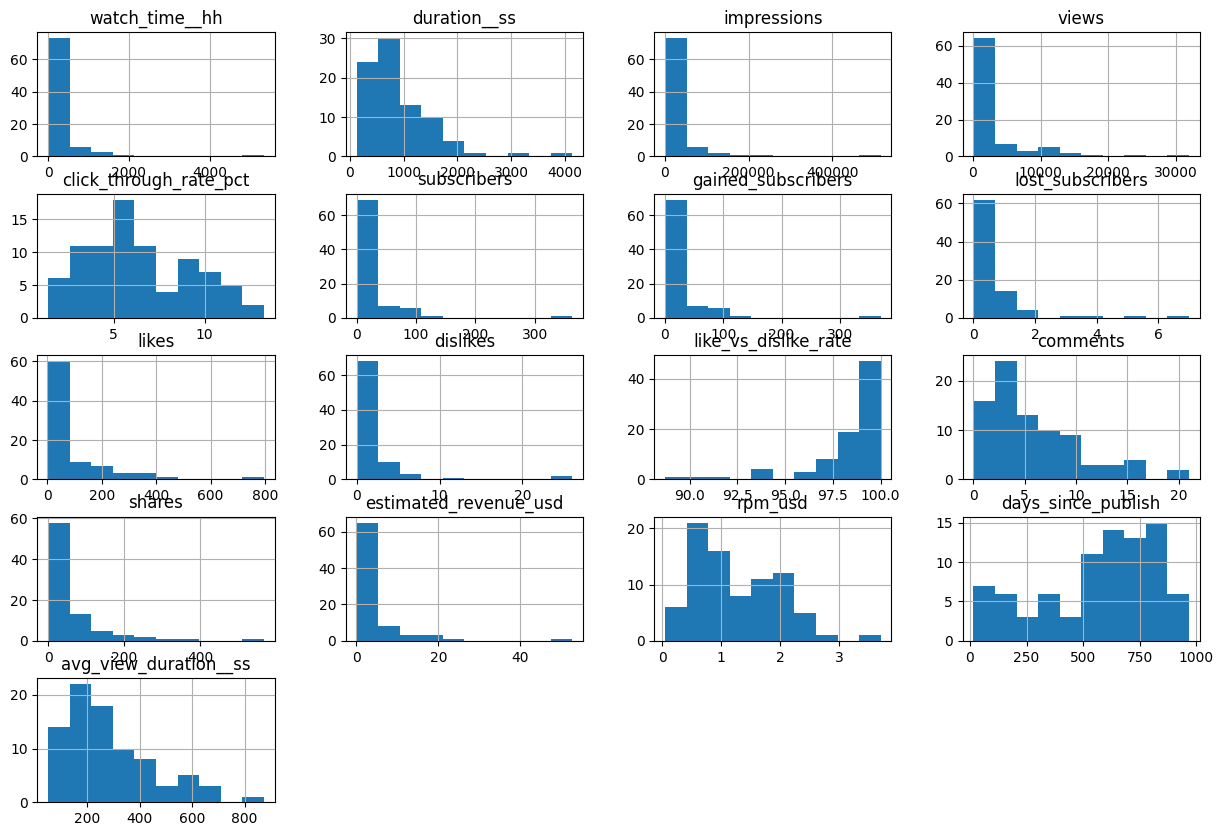

In [111]:
# Analisa todas as variáveis numéricas de uma só vez - Histograma

stg__gastronomades[numeric_columns].hist(figsize=(15,10))
plt.show()

Interpretação: O gráfico evidenciou a assimatria de todas as variáveis, não parecendo existir uma distribuição normal para nenhum dos atributos numéricos.

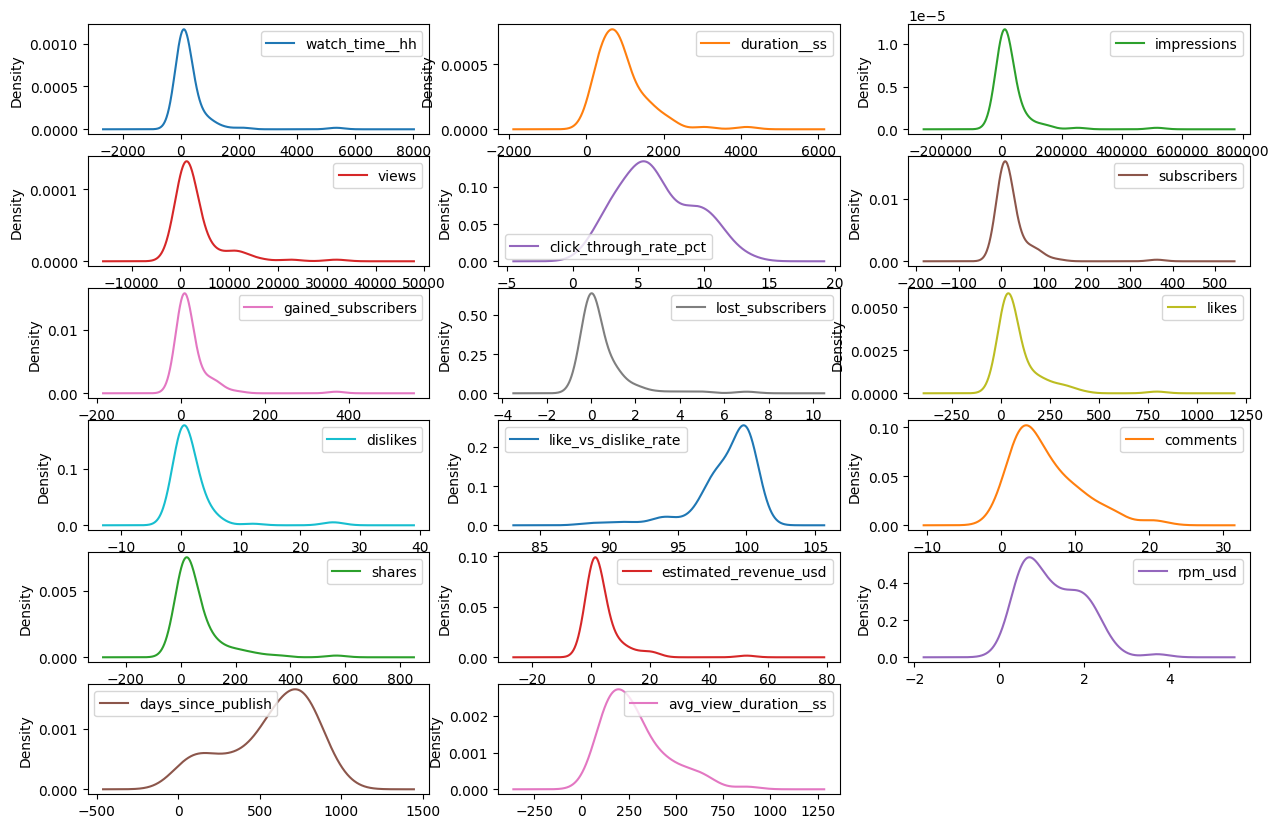

In [112]:
# Analisa todas as variáveis numéricas de uma só vez - Kernel

stg__gastronomades[numeric_columns].plot(kind='density', subplots=True, layout=(6,3), sharex=False, figsize=(15,10))
plt.show()

Interpretação: O gráfico evidenciou com mais precisão a assimetria dos dados, porém este ajuste foi um pouco incoerente para várias variáveis cuja métrica foi modelada com possibilidade de valor negativo, o que na prática não faz sentido. Por exemplo, um vídeo não pode ter receita negativa, nem comentário, etc.

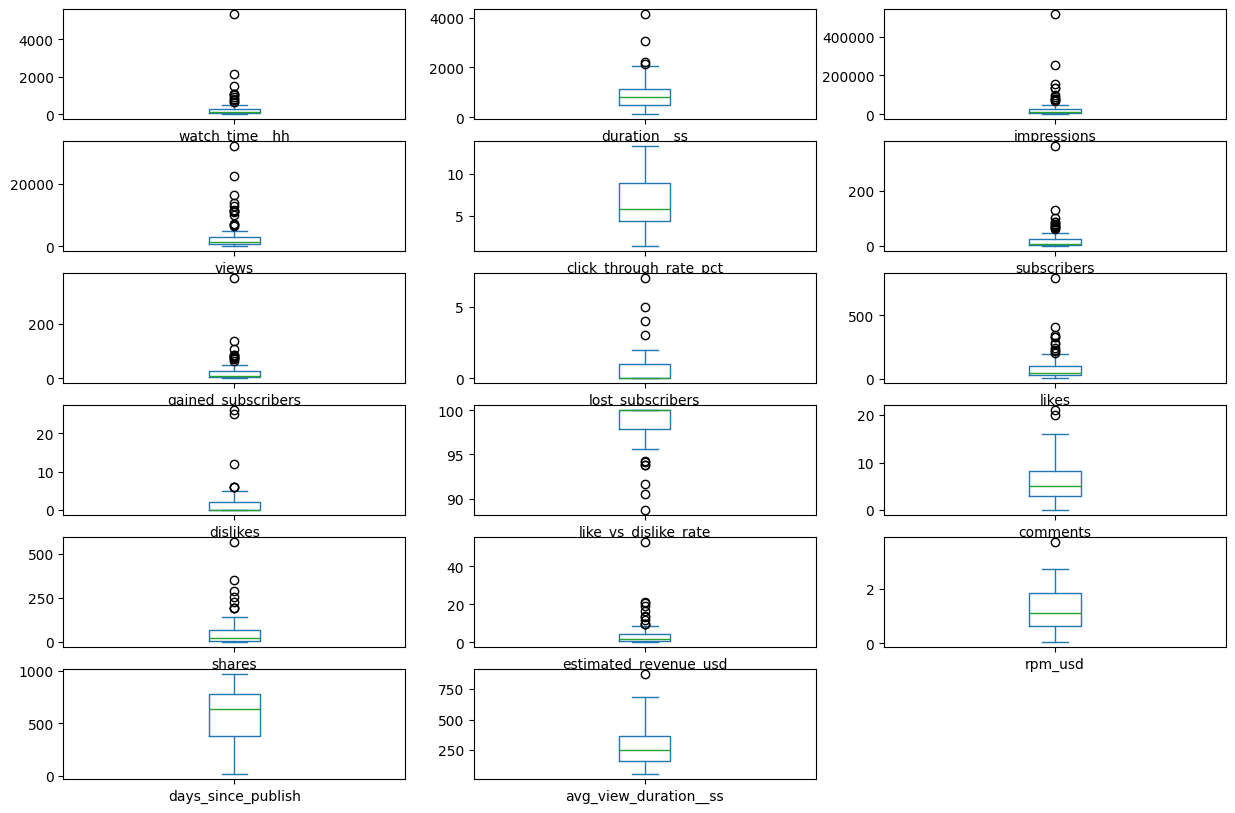

In [113]:
# Analisa todas as variáveis numéricas de uma só vez - Boxplot

stg__gastronomades[numeric_columns].plot(kind='box', subplots=True, layout=(6,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

Interpretação: o gráfico mostrou a presença de outliers na maioria dos gráficos, o que não é positivo pra análise, porém é "entendível" a nível de negócio. Pois o canal não tem muito tempo, fizemos muitos testes e só nos últimos 6 meses que temos postados vídeos mais consistentes/homogênos, com um certo padrão e estilo.

### Variáveis categóricas


/tmp/ipython-input-114-3705196641.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')


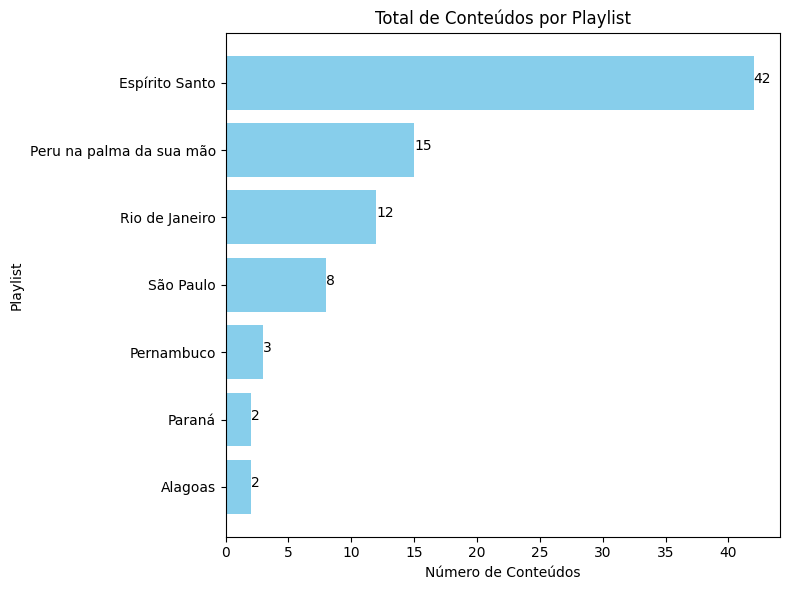

In [114]:
import matplotlib.pyplot as plt

# Primeiro: crie uma contagem por playlist
playlist_counts = (
    stg__gastronomades
    .groupby('playlist')
    .size()
    .sort_values(ascending=True)  # ascending=True para lista vertical do menor pro maior
)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(playlist_counts.index, playlist_counts.values, color='skyblue')

# Títulos e legendas
plt.title("Total de Conteúdos por Playlist")
plt.xlabel("Número de Conteúdos")
plt.ylabel("Playlist")

# Exibir valores no final das barras (opcional)
for index, value in enumerate(playlist_counts.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()


Interpretação: A maioria dos vídeos são do Espírito Santo, seguidos pelo Peru e pelo Rio de Janeiro.

In [115]:
# Variável: views

#resumo das stats
stg__gastronomades['views'].describe()

# identificação de registros que chamaram a atenção
stg__gastronomades[stg__gastronomades['views']==64]

,content_id,content_name,playlist,publish_date,watch_time__hh,avg_view_duration,duration__ss,impressions,views,click_through_rate_pct,...,likes,dislikes,like_vs_dislike_rate,comments,shares,estimated_revenue_usd,rpm_usd,days_since_publish,avg_view_duration__ss,copyright_flag
83,v2KhSWdeQVg,CASAMOS NO PERÚ,Peru na palma da sua mão,2024-01-09,0.9137,0:00:51,123,570,64,5.61,...,3,0,100.0,0,0,0.035,0.547,538,51,False


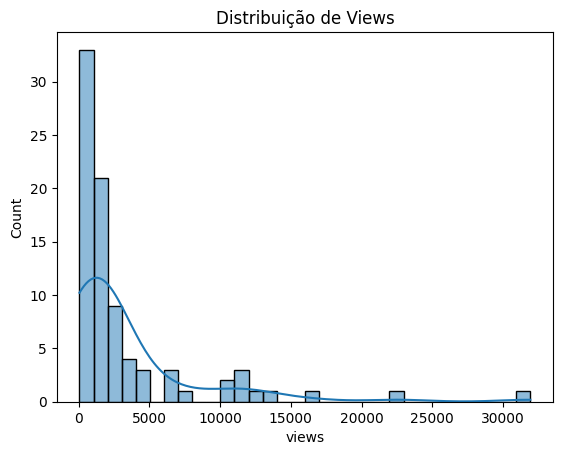

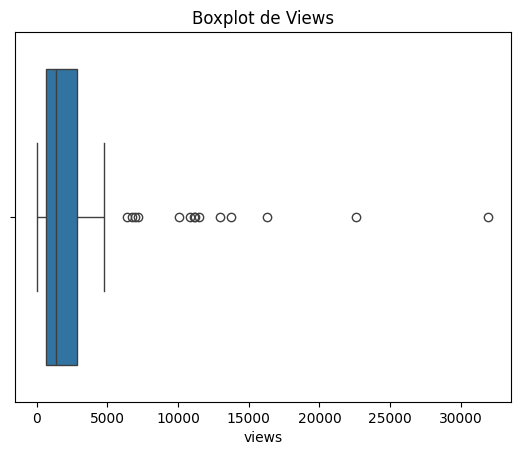

In [116]:
stg__gastronomades['views'].describe()

# Histograma
sns.histplot(stg__gastronomades['views'], kde=True)
plt.title('Distribuição de Views')
plt.show()

# Boxplot
sns.boxplot(x=stg__gastronomades['views'])
plt.title('Boxplot de Views')
plt.show()

## Análise Bivariada


### Playlist vs Métricas de alcance

/tmp/ipython-input-117-4134836498.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['impressions']
/tmp/ipython-input-117-4134836498.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Impressões por Playlist:

                   playlist     sum      mean    median     max       std
2                    Paraná  518974  259487.0  259487.0  515258  361714.8
0                   Alagoas  210586  105293.0  105293.0  132731   38803.2
5            Rio de Janeiro  716732   59727.7   12503.0  253246   80208.0
6                 São Paulo  179638   22454.8   14031.0   96767   30612.8
3                Pernambuco   67268   22422.7   27747.0   30811   11973.9
1            Espírito Santo  795715   18945.6   10743.0   89963   21204.1
4  Peru na palma da sua mão  144186    9612.4    5194.0   44635   12541.2


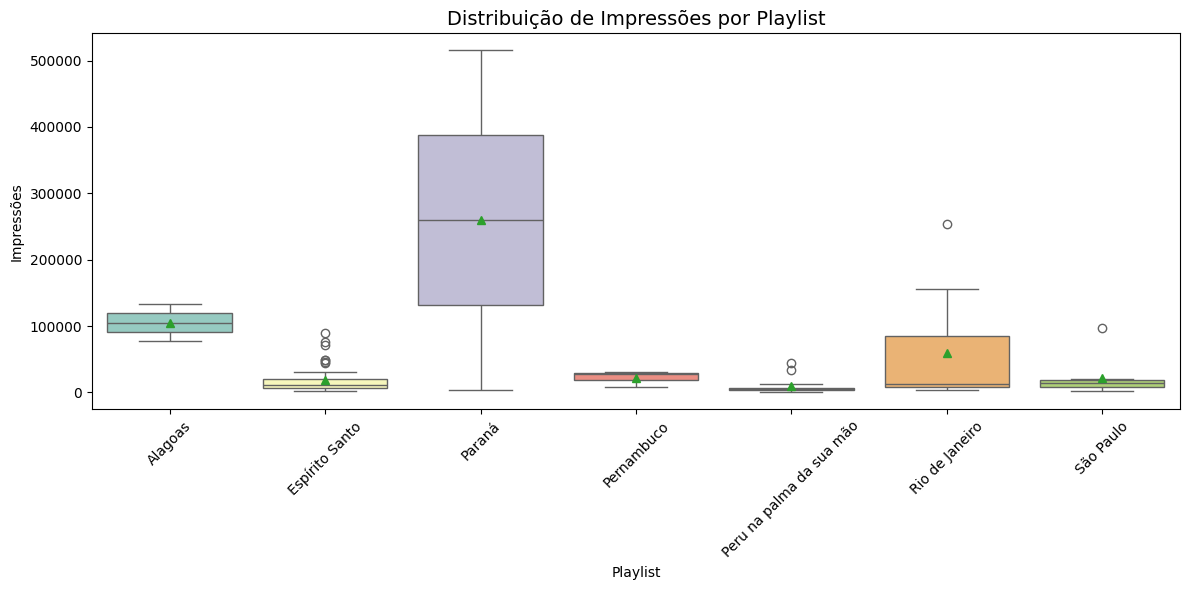

,playlist,content_name,avg_view_duration,impressions
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,515258
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,132731
2,Rio de Janeiro,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,0:05:30,253246
5,Espírito Santo,O que fazer em SANTA TERESA | O MELHOR do Circ...,0:04:42,89963
12,Peru na palma da sua mão,ONDE COMER em CUSCO PERU | Os Melhores Restaur...,0:06:07,44635
14,São Paulo,O MELHOR Parque de Trampolim de São Paulo | Im...,0:02:12,96767
43,Pernambuco,RECIFE é o MELHOR destino gastronômico do Brasil,0:08:09,30811


In [117]:
# Impressões por playlist


# Calcula média, mediana e desvio padrão por playlist
impressions_stats = (
    stg__gastronomades
    .groupby('playlist')['impressions']
    .agg(['sum','mean', 'median','max','std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Impressões por Playlist:\n")
print(impressions_stats)



# Gráfico
# Define o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Cria o boxplot: Playlist no eixo X, Impressões no eixo Y
sns.boxplot(
    data=stg__gastronomades,
    x='playlist',       # playlist agora é eixo x
    y='impressions',    # impressões eixo y
    palette='Set3',     # define paleta de cores para diferenciar playlists
    showmeans=True
)

# Títulos e labels
plt.title('Distribuição de Impressões por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Impressões')

plt.xticks(rotation=45)  # Rotaciona labels se tiverem nomes grandes
plt.tight_layout()
plt.show()


# Exibe outliers manulmente
stg__gastronomades[stg__gastronomades['impressions'].isin([515258,253246,132731,96767,30811,89963,44635])][['playlist','content_name','avg_view_duration','impressions']]

Interpretação: Em média, os vídeos que mais tiveram impressões foram dos estados: Paraná e Alagoas, porém em ambos temos apenas 2 vídeos na playlist, o que torna a média um pouco ineficaz, assim como a mediana. Em contra partida, o Espírito Santo, onde moramos, é o estado com mais vídeos e o segundo menor número mediano de impressões. Será que isso pode significar que o estado não tem procura turistica?
<br><br><br>
Destaques:
- O vídeo de Pernambuco com maior número de impressões é o de Gastronomia, ou seja, imprimiu mais que Carneiros e Porto de Galinhas. Será que o mau desempenho pode ter a ver com a escolha das thumbs?
<br><br><br>
Obs: Alta variabilidade do Paraná > Sabemos que é de Curitiba o vídeo do canal com melhor engajamento, alcance e receita.


/tmp/ipython-input-118-4196738248.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['views']
/tmp/ipython-input-118-4196738248.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Views por Playlist:

                   playlist     sum     mean   median    max      std
2                    Paraná   32389  16194.5  16194.5  31933  22257.6
0                   Alagoas   18180   9090.0   9090.0  11215   3005.2
5            Rio de Janeiro   73360   6113.3   1906.5  22554   7294.7
6                 São Paulo   21579   2697.4   1834.5  11472   3661.5
1            Espírito Santo  111068   2644.5   1559.0  13733   3283.7
3                Pernambuco    3658   1219.3    855.0   2165    826.1
4  Peru na palma da sua mão   17411   1160.7    777.0   4427   1225.4


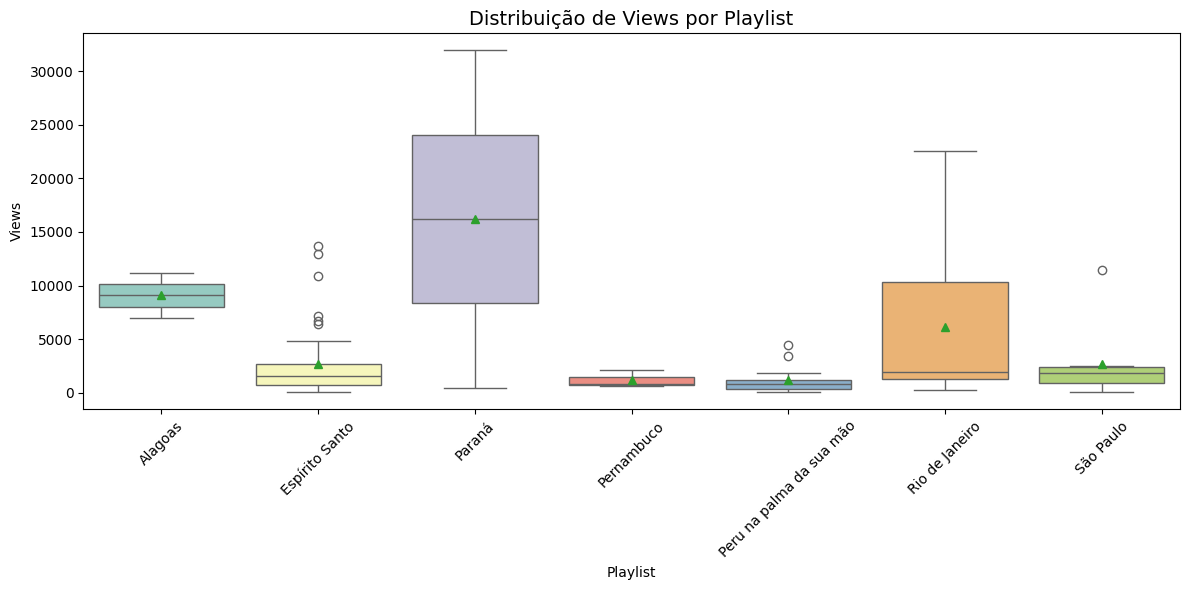

,playlist,content_name,avg_view_duration,views
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,31933
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,11215
3,Espírito Santo,Conheça as MONTANHAS de GUARAPARI | O MELHOR d...,0:04:45,13733
7,Rio de Janeiro,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,0:02:07,22554
12,Peru na palma da sua mão,ONDE COMER em CUSCO PERU | Os Melhores Restaur...,0:06:07,4427
14,São Paulo,O MELHOR Parque de Trampolim de São Paulo | Im...,0:02:12,11472
19,Pernambuco,Descubra PORTO de GALINHAS | O VILAREJO mais i...,0:09:15,2165


In [118]:
# Views por playlist

# Calcula soma, média, mediana, máximo e desvio padrão por playlist
views_stats = (
    stg__gastronomades
    .groupby('playlist')['views']
    .agg(['sum','mean', 'median','max','std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Views por Playlist:\n")
print(views_stats)

# Gráfico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',      # playlist eixo X
    y='views',         # views eixo Y
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição de Views por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Views')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe vídeos com valores altos de views (substitua esses valores conforme os outliers reais que quiser analisar)
stg__gastronomades[stg__gastronomades['views'].isin([31933, 11215   , 22554, 11472, 13733   , 2165    , 4427   ])][['playlist','content_name','avg_view_duration','views']]


Interpretação: Em média, os vídeos que mais tiveram visualizações foram dos estados: Paraná e Alagoas enquanto que as piores foram do Peru e Pernambuco.
<br><br><br>
Destaques:
- Maior número de views no ES é do vídeo de Guarapari antigo da Rota da Ferradura
- Porto de Galinhas tem o maior número de views de Pernambuco.


/tmp/ipython-input-119-83623718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['click_through_rate_pct']
/tmp/ipython-input-119-83623718.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Taxa de Cliques de Impressões (%) por Playlist:

                   playlist     sum  mean  median    max   min   std
5            Rio de Janeiro   88.19  7.35    7.84  12.41  2.81  3.26
1            Espírito Santo  279.47  6.65    6.54  11.46  1.40  2.82
4  Peru na palma da sua mão   92.43  6.16    5.61  11.42  3.57  2.16
6                 São Paulo   48.02  6.00    4.94  13.26  2.29  3.91
0                   Alagoas   11.49  5.74    5.74   5.80  5.69  0.08
2                    Paraná    7.36  3.68    3.68   3.92  3.44  0.34
3                Pernambuco   10.77  3.59    4.44   4.91  1.42  1.89


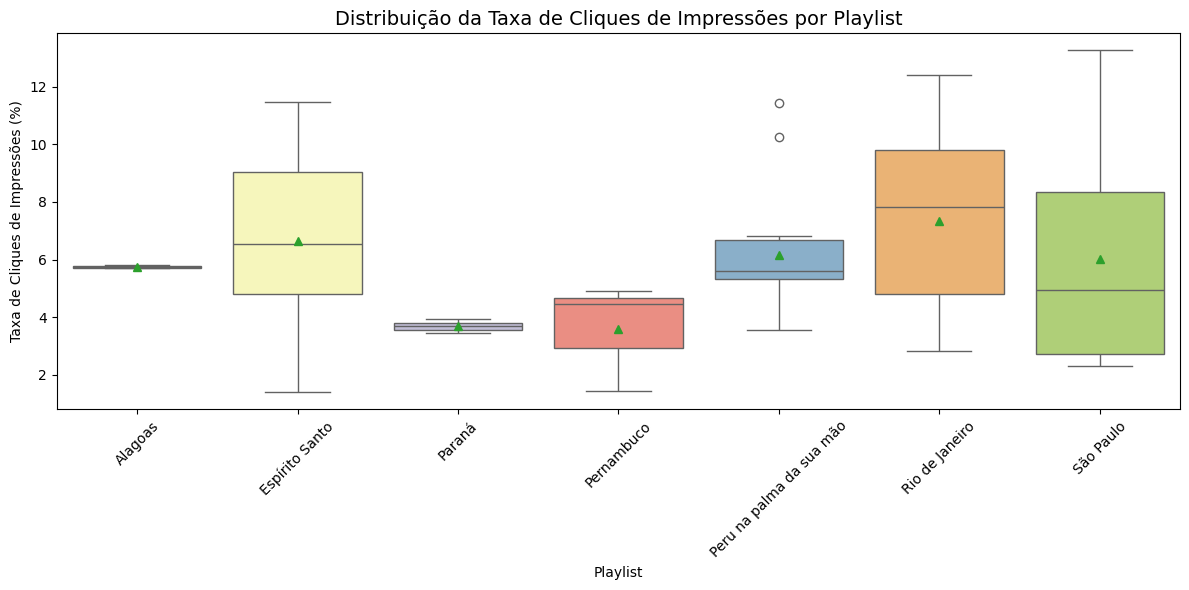

,playlist,content_name,avg_view_duration,click_through_rate_pct
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,3.92
4,Alagoas,O que fazer em Milagres | O MELHOR da Rota Eco...,0:09:22,5.80
7,Rio de Janeiro,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,0:02:07,12.41
19,Pernambuco,Descubra PORTO de GALINHAS | O VILAREJO mais i...,0:09:15,4.91
45,Espírito Santo,LAVANDÁRIO ROTA DA PEDRA EM PEDRA AZUL - ES,0:02:39,11.46
47,São Paulo,CALÇADÃO URBANÓIDE NA RUA AUGUSTA - SÃO PAULO,0:01:44,13.26
52,Peru na palma da sua mão,Descubra onde se HOSPEDAR em Cusco PERU | Hote...,0:03:13,11.42


In [119]:
# Taxa de cliques por playlist

# Calcula soma, média, mediana, máximo e desvio padrão por playlist
ctr_stats = (
    stg__gastronomades
    .groupby('playlist')['click_through_rate_pct']
    .agg(['sum','mean', 'median','max','min','std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(2)
)

print("Estatísticas de Taxa de Cliques de Impressões (%) por Playlist:\n")
print(ctr_stats)

# Gráfico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='click_through_rate_pct',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição da Taxa de Cliques de Impressões por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Taxa de Cliques de Impressões (%)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe vídeos com valores altos de CTR (exemplo de valores - ajuste se quiser)

#melhor taxa de cliques
stg__gastronomades[
    stg__gastronomades['click_through_rate_pct'].isin([12.41, 11.46, 11.42, 13.26, 5.80, 3.92,4.91])
][['playlist','content_name','avg_view_duration','click_through_rate_pct']]

#pior taxa de cliques
#stg__gastronomades[
    ##stg__gastronomades['click_through_rate_pct'].isin([2.81,1.4,3.57,2.29,5.69,3.44,1.42])
#][['playlist','content_name','avg_view_duration','click_through_rate_pct']]


Interpretação: Em média, os vídeos que mais tiveram taxas de cliques altas foram dos estados: Rio de Janeiro, Espírito Santo e Peru. A mediana confirma RJ e ES, mas tira Peru e coloca Alagoas no top 3. Em contra partida, Paraná e Pernambuco tem as piores taxas, provavelmente isso tenha associação com o fato de terem tido o maior número de impressões.
<br><br><br>
Destaques:
- O vídeo do RJ com maior taxa de cliques é o de Nudismo
- O vídeo do ES com maior taxa de cliques é o do Lavandário
- O vídeo de SP com maior taxa de cliques é Calçadão Urbanoide
- O vídeo do Peru com a maior taxa de cliques é de hotel, do Casona Plaza

- o vídeo de Ibiraçú teve a pior taxa de cliques do canal, ao lado do de Recife
- Vídeo da Carlos Bakery e Roteiro de Búzios de 1h também foram bem ruins

### Playlist vs Métricas de engajamento

/tmp/ipython-input-120-3652471593.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['subscribers']
/tmp/ipython-input-120-3652471593.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Inscritos por Playlist:

                   playlist  sum   mean  median  max    std
2                    Paraná  370  185.0   185.0  363  251.7
0                   Alagoas  156   78.0    78.0   86   11.3
5            Rio de Janeiro  479   39.9    13.5  131   44.2
1            Espírito Santo  818   19.5    11.5   86   22.2
6                 São Paulo   86   10.8     7.0   45   14.9
3                Pernambuco   25    8.3     6.0   13    4.0
4  Peru na palma da sua mão  103    6.9     3.0   26    8.4


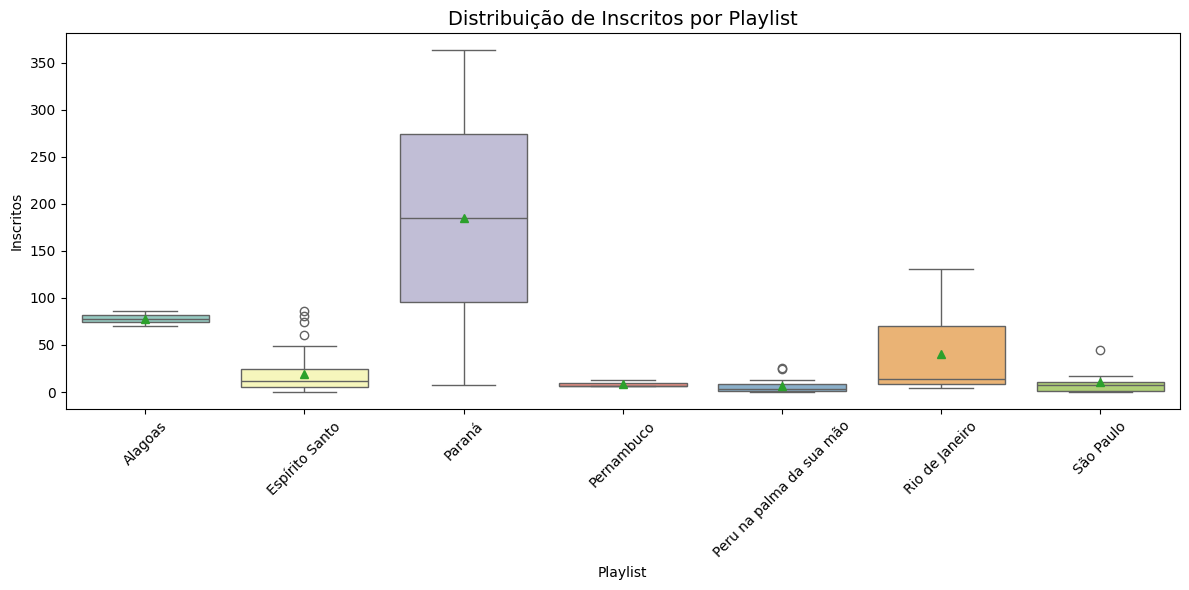

,playlist,content_name,avg_view_duration,subscribers
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,363
4,Alagoas,O que fazer em Milagres | O MELHOR da Rota Eco...,0:09:22,86
5,Espírito Santo,O que fazer em SANTA TERESA | O MELHOR do Circ...,0:04:42,86
7,Rio de Janeiro,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,0:02:07,131
13,Peru na palma da sua mão,O que comer em CUSCO PERU | Comida de Rua e Su...,0:07:38,26
14,São Paulo,O MELHOR Parque de Trampolim de São Paulo | Im...,0:02:12,45
19,Pernambuco,Descubra PORTO de GALINHAS | O VILAREJO mais i...,0:09:15,13
28,Peru na palma da sua mão,Tudo que você PRECISA SABER antes de viajar pa...,0:04:32,13
30,Espírito Santo,CONDOMÍNIO VISTA AZUL + HOSPEDAGEM EM PEDRA AZ...,0:04:24,13


In [120]:
# Inscritos por playlist

# Calcula soma, média, mediana, máximo e desvio padrão por playlist
subscribers_stats = (
    stg__gastronomades
    .groupby('playlist')['subscribers']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Inscritos por Playlist:\n")
print(subscribers_stats)

# Gráfico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='subscribers',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição de Inscritos por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Inscritos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe vídeos com valores altos de inscritos (exemplo de valores - ajuste se quiser)
stg__gastronomades[
    stg__gastronomades['subscribers'].isin([363, 86, 131,45,13,26   ])  # troque pelos maiores do seu dataset
][['playlist','content_name','avg_view_duration','subscribers']]


Interpretação: Em média, os vídeos com maior saldo de inscritos obtidos foram do Alagoas, Espírito Santo, Rio de Janeiro e Paraná. Espírito Santo se destaca pela quantidade de vídeos (pelo menos 3x mais que outros estados), Rio de Janeiro pelo da Praia de Nudismo e Paraná Curitiba por causa do vídeo de gastronomia.
<br><br><br>
Destaques:
- O vídeo que mais saldo de inscrito foi o de Gastronomia Curitibana e, na sequência um do Circuito Caravaggio em Santa Teresa, no ES. Vale dar uma olhada se pedimos pra se inscrever de alguma forma específica ou em algum momento quente do vídeo.
- Pernambuco foi o estado com pior saldo de inscritos do canal.
- O vídeo de Milagres deu mais inscrito do que o de Maragogi, será que pedimos pra se inscrever de uma forma diferente?


/tmp/ipython-input-121-1582032666.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['lost_subscribers']
/tmp/ipython-input-121-1582032666.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Inscritos Perdidos por Playlist:

                   playlist  sum  mean  median  max  std
2                    Paraná    7   3.5     3.5    7  4.9
0                   Alagoas    3   1.5     1.5    3  2.1
5            Rio de Janeiro   14   1.2     0.5    5  1.7
3                Pernambuco    2   0.7     0.0    2  1.2
1            Espírito Santo   12   0.3     0.0    2  0.6
4  Peru na palma da sua mão    2   0.1     0.0    1  0.4
6                 São Paulo    1   0.1     0.0    1  0.4


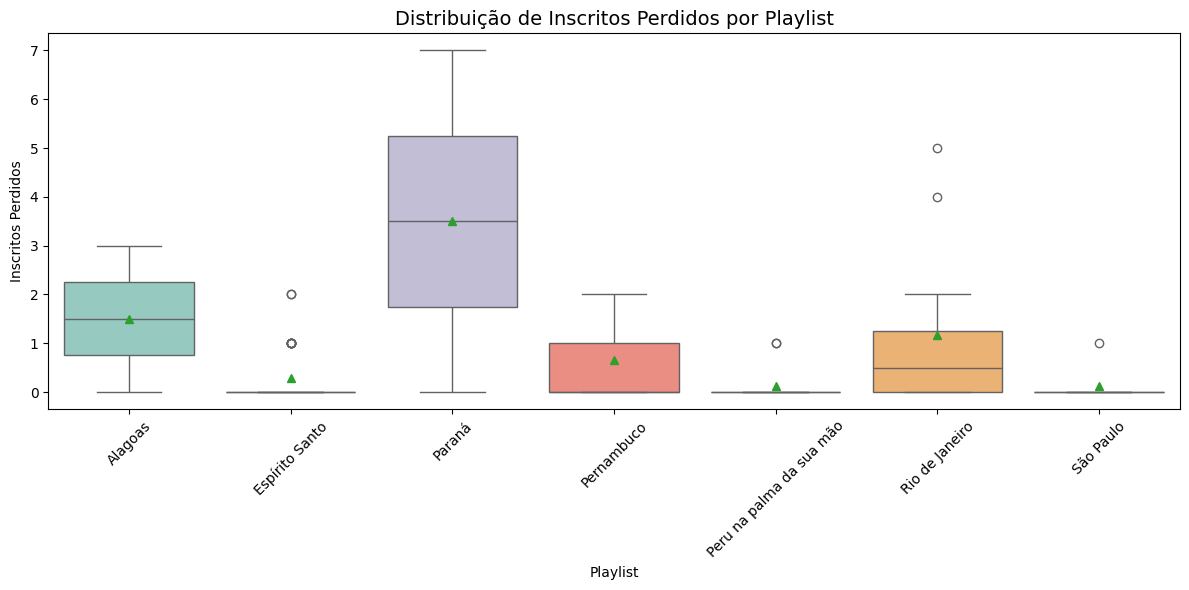

,playlist,content_name,avg_view_duration,lost_subscribers
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,7
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,3
7,Rio de Janeiro,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,0:02:07,5


In [121]:
# Inscritos Perdidos por playlist

# Calcula soma, média, mediana, máximo e desvio padrão por playlist
lost_subscribers_stats = (
    stg__gastronomades
    .groupby('playlist')['lost_subscribers']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Inscritos Perdidos por Playlist:\n")
print(lost_subscribers_stats)

# Gráfico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='lost_subscribers',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição de Inscritos Perdidos por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Inscritos Perdidos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe vídeos com valores altos de inscritos perdidos (substitua pelos maiores do seu dataset)
stg__gastronomades[
    stg__gastronomades['lost_subscribers'].isin([7,5,3])  # ajuste conforme o max que aparecer
][['playlist','content_name','avg_view_duration','lost_subscribers']]


/tmp/ipython-input-122-2024110136.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['watch_time__hh']
/tmp/ipython-input-122-2024110136.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Tempo Total de Visualização (horas) por Playlist:

                   playlist     sum     min    mean  median     max     std
2                    Paraná  5394.6    51.6  2697.3  2697.3  5343.0  3741.6
0                   Alagoas  3216.4  1087.7  1608.2  1608.2  2128.7   736.1
5            Rio de Janeiro  4838.2    17.4   403.2   148.0  1495.7   460.5
3                Pernambuco   579.7    86.7   193.2   158.7   334.3   127.3
1            Espírito Santo  8035.3     4.1   191.3    87.1  1090.3   261.7
6                 São Paulo  1047.8     4.5   131.0    57.1   420.9   162.3
4  Peru na palma da sua mão  1684.0     0.9   112.3    69.0   452.2   139.8


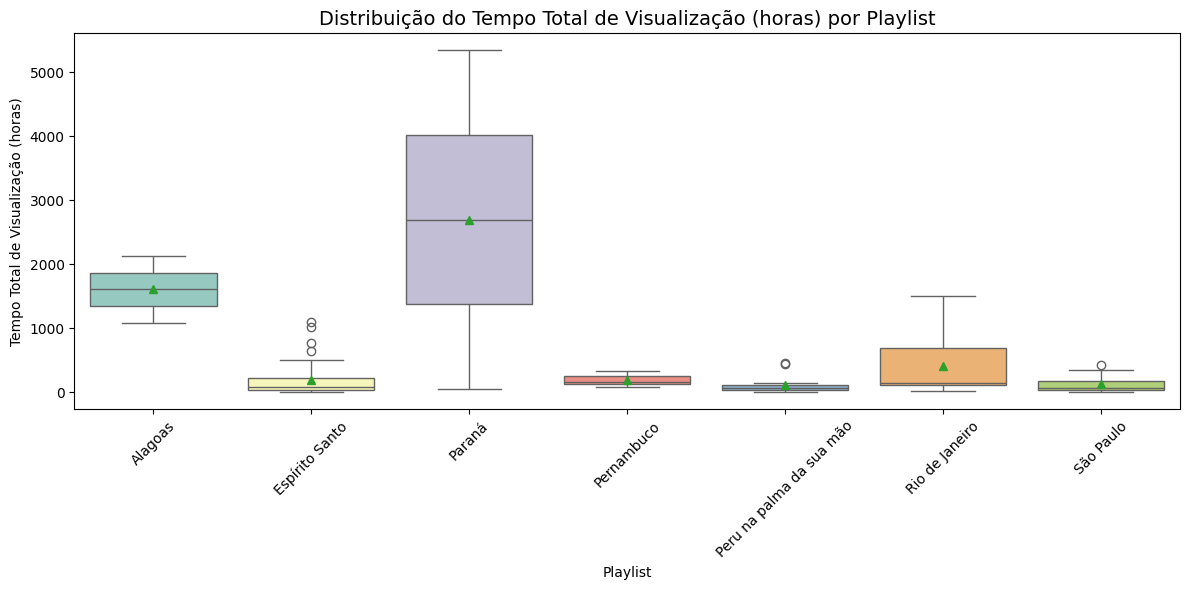

,playlist,content_name,avg_view_duration,watch_time__hh
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,5343.0193
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,2128.7062
2,Rio de Janeiro,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,0:05:30,1495.6786
3,Espírito Santo,Conheça as MONTANHAS de GUARAPARI | O MELHOR d...,0:04:45,1090.3399


In [122]:
# 📊 Estatísticas de Tempo Total de Visualização (horas) por Playlist

# Calcula soma, média, mediana, máximo e desvio padrão
watch_time_stats = (
    stg__gastronomades
    .groupby('playlist')['watch_time__hh']
    .agg(['sum','min', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Tempo Total de Visualização (horas) por Playlist:\n")
print(watch_time_stats)

# 📈 Gráfico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='watch_time__hh',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição do Tempo Total de Visualização (horas) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Tempo Total de Visualização (horas)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#top vídeos independente da playlist
#top_watch_time = (
#    stg__gastronomades
#    .nlargest(10, 'watch_time__hh')
#    [['content_name', 'watch_time__hh']]
#)
#
#print("\nTop 5 vídeos com maior Tempo Total de Visualização (horas):\n")
#print(top_watch_time)


# Vídeos com maior tempo de visualização
stg__gastronomades[
    stg__gastronomades['watch_time__hh'].isin([5343.0193,2128.7062,1495.6786,1090.3399])  # ajuste conforme o max que aparecer
][['playlist','content_name','avg_view_duration','watch_time__hh']]

/tmp/ipython-input-123-3225414685.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['likes']
/tmp/ipython-input-123-3225414685.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Likes por Playlist:

                   playlist   sum   mean  median  max    std
2                    Paraná   827  413.5   413.5  796  540.9
0                   Alagoas   501  250.5   250.5  275   34.6
5            Rio de Janeiro  1401  116.8    52.0  333  108.3
1            Espírito Santo  3634   86.5    49.0  409   95.0
6                 São Paulo   379   47.4    39.5  167   50.6
3                Pernambuco   138   46.0    44.0   61   14.1
4  Peru na palma da sua mão   632   42.1    29.0  146   41.7


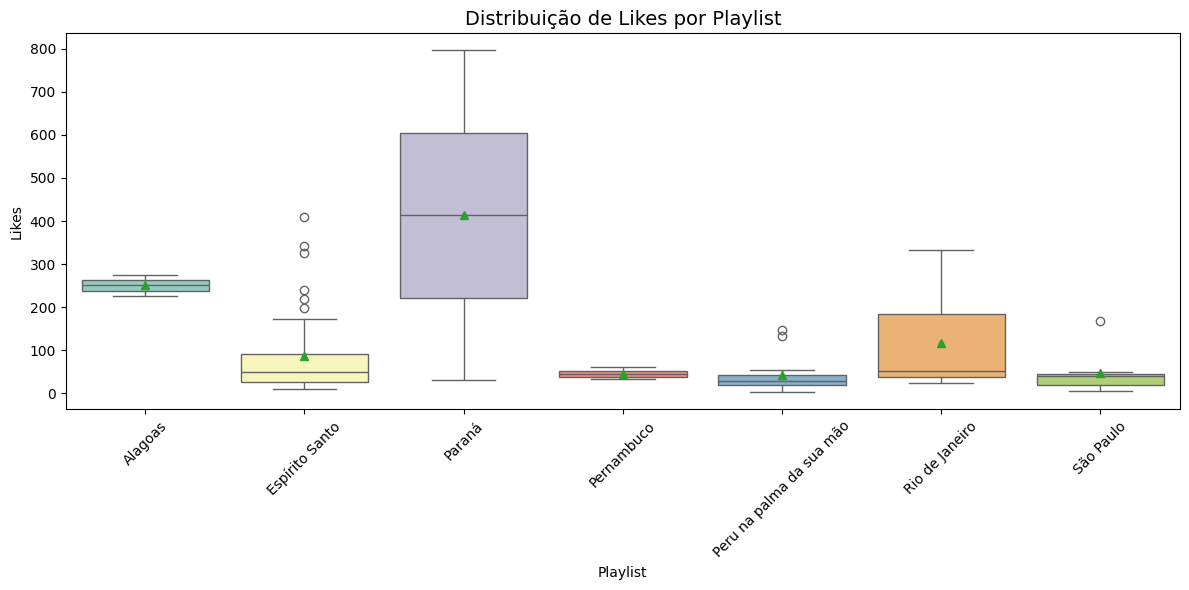

,playlist,content_name,avg_view_duration,likes
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,796
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,275
2,Rio de Janeiro,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,0:05:30,333
5,Espírito Santo,O que fazer em SANTA TERESA | O MELHOR do Circ...,0:04:42,409
12,Peru na palma da sua mão,ONDE COMER em CUSCO PERU | Os Melhores Restaur...,0:06:07,146
14,São Paulo,O MELHOR Parque de Trampolim de São Paulo | Im...,0:02:12,167
19,Pernambuco,Descubra PORTO de GALINHAS | O VILAREJO mais i...,0:09:15,61


In [123]:
# Likes por playlist

# 📊 Calcula soma, média, mediana, máximo e desvio padrão por playlist
likes_stats = (
    stg__gastronomades
    .groupby('playlist')['likes']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Likes por Playlist:\n")
print(likes_stats)

# 📈 Gráfico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='likes',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição de Likes por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Likes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 👀 Exibe vídeos com valores altos de Likes (ajuste conforme o seu dataset)
# Dica: pode usar top N automáticos também!
stg__gastronomades[
    stg__gastronomades['likes'].isin([796, 275, 333,409,167,61,146])  # Substitua pelos valores mais altos que aparecerem no seu caso
][['playlist','content_name','avg_view_duration','likes']]


Interpretação: A melhor média de likes é para os estados de Paraná e Alagoas. O ES tem uma média de likes baixa por vídeo.
<br><br><br>
Destaques:
- O vídeo do Peru com mais likes é o de restaurantes
- O vídeo do ES com mais likes é o do Circuito Caravaggio, o mesmo que teve destaque anteriormente
- O vídeo de Gastronomia Curitibana tem o maior número de likes do canal


/tmp/ipython-input-124-846595018.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['dislikes']
/tmp/ipython-input-124-846595018.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Dislikes por Playlist:

                   playlist  sum  mean  median  max   std
2                    Paraná   25  12.5    12.5   25  17.7
5            Rio de Janeiro   51   4.2     1.0   26   7.7
0                   Alagoas    8   4.0     4.0    6   2.8
3                Pernambuco    6   2.0     2.0    4   2.0
1            Espírito Santo   49   1.2     0.5    6   1.6
6                 São Paulo    7   0.9     1.0    2   0.8
4  Peru na palma da sua mão    6   0.4     0.0    3   1.1


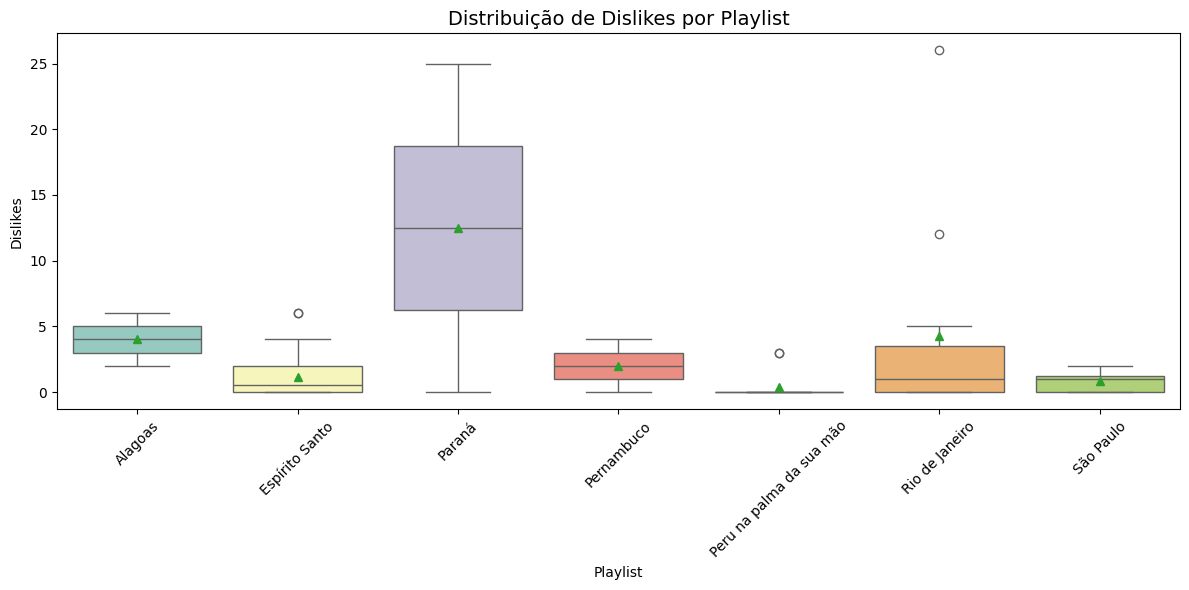

,playlist,content_name,avg_view_duration,dislikes
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,25
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,6
3,Espírito Santo,Conheça as MONTANHAS de GUARAPARI | O MELHOR d...,0:04:45,6
7,Rio de Janeiro,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,0:02:07,26
10,Espírito Santo,Hospedagem CHALÉ CONTAINER em SANTA TERESA - ES,0:03:34,6
19,Pernambuco,Descubra PORTO de GALINHAS | O VILAREJO mais i...,0:09:15,4
23,Espírito Santo,LAVANDÁRIO PEDRA AZUL - ES,0:02:53,4
33,Espírito Santo,Descubra a CACHOEIRA de MATILDE em Alfredo Cha...,0:02:32,4


In [124]:
# 👎 Dislikes por playlist

# 📊 Calcula soma, média, mediana, máximo e desvio padrão por playlist
dislikes_stats = (
    stg__gastronomades
    .groupby('playlist')['dislikes']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Dislikes por Playlist:\n")
print(dislikes_stats)

# 📈 Gráfico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='dislikes',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição de Dislikes por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Dislikes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 👀 Exibe vídeos com valores altos de Dislikes (substitua pelos valores mais altos do seu dataset)
stg__gastronomades[
    stg__gastronomades['dislikes'].isin([25,26,6,4])  # Ajuste conforme os valores reais
][['playlist','content_name','avg_view_duration','dislikes']]


Interpretação: Rio de Janeiro e Espírito Santo lideram o ranking de dislikes, com destaques para o vídeo de Nudismo do RJ. Outro vídeo que apresentou muito dislike foi o de Gastronomia de Curitiba, mas é aceitável tendo em vista o alcance dele.


/tmp/ipython-input-125-1517508026.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['comments']
/tmp/ipython-input-125-1517508026.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Comentários por Playlist:

                   playlist  sum  mean  median  max  std
0                   Alagoas   28  14.0    14.0   15  1.4
2                    Paraná   17   8.5     8.5   15  9.2
5            Rio de Janeiro   97   8.1     8.0   20  5.3
1            Espírito Santo  269   6.4     6.0   21  4.6
4  Peru na palma da sua mão   59   3.9     4.0    8  2.3
3                Pernambuco   11   3.7     4.0    4  0.6
6                 São Paulo   25   3.1     3.0    8  2.5


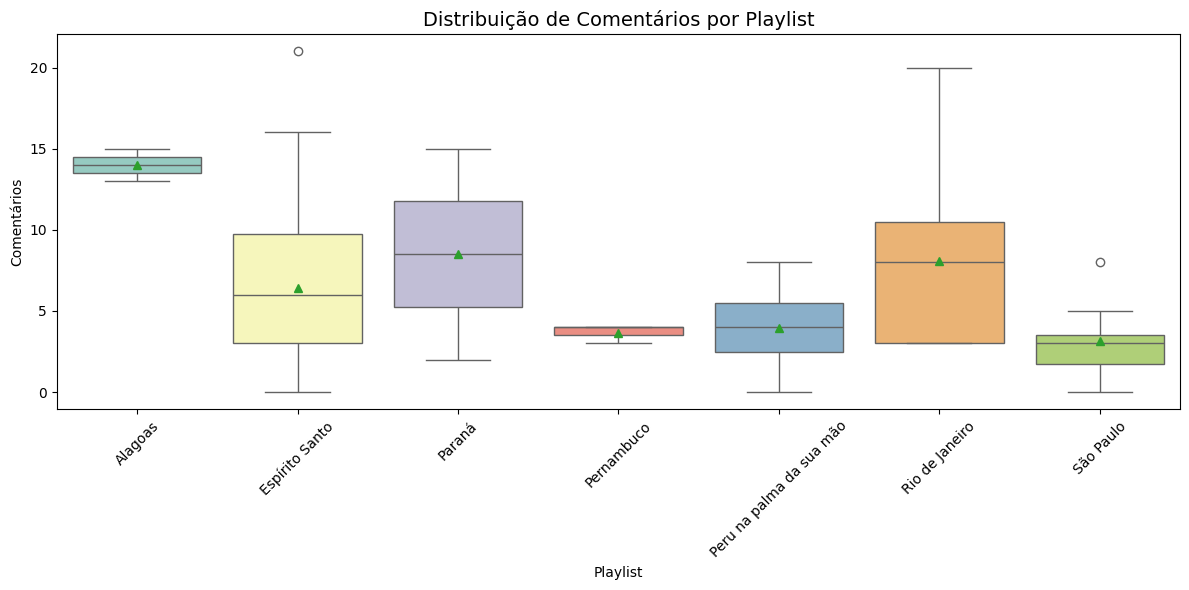

,playlist,content_name,avg_view_duration,comments
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,15
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,15
7,Rio de Janeiro,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,0:02:07,20
22,Espírito Santo,Páscoa nas MONTANHAS CAPIXABAS | Domingos Mart...,0:03:41,21
42,Espírito Santo,Descubra o bar do GALO | Bar TEMÁTICO do Atlét...,0:02:25,15


In [125]:
# 💬 Comentários por playlist

# 📊 Calcula soma, média, mediana, máximo e desvio padrão por playlist
comments_stats = (
    stg__gastronomades
    .groupby('playlist')['comments']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Comentários por Playlist:\n")
print(comments_stats)

# 📈 Gráfico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='comments',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição de Comentários por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Comentários')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 👀 Exibe vídeos com valores altos de Comentários (substitua pelos valores mais altos do seu dataset)
stg__gastronomades[
    stg__gastronomades['comments'].isin([21,20,15])  # Ajuste conforme os valores reais
][['playlist','content_name','avg_view_duration','comments']]


Interpretação: Esse é o primeiro gráfico em que Paraná não fica em destaque. Na visão geral, ES lidera com mais comentários, mas vale lembrar que ES tem muitos vídeos. Em média, Alagoas tem a maior média de comentários por vídeo, mas são apenas 2 vídeos nessa playlist.
<br><br><br>
Destaques:
- O vídeo de Páscoa de Domingos Martins no ES é o vídeo com mais comentários do canal, seguido do da Praia de Nudismo no RJ.



/tmp/ipython-input-126-3743082869.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['shares']
/tmp/ipython-input-126-3743082869.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Compartilhamentos por Playlist:

                   playlist   sum   mean  median  max    std
2                    Paraná   264  132.0   132.0  255  173.9
0                   Alagoas   168   84.0    84.0   85    1.4
1            Espírito Santo  3167   75.4    41.5  567  106.9
5            Rio de Janeiro   719   59.9    37.0  194   57.3
6                 São Paulo   438   54.8    24.0  289   96.9
3                Pernambuco    36   12.0    13.0   18    6.6
4  Peru na palma da sua mão   177   11.8     8.0   57   13.7


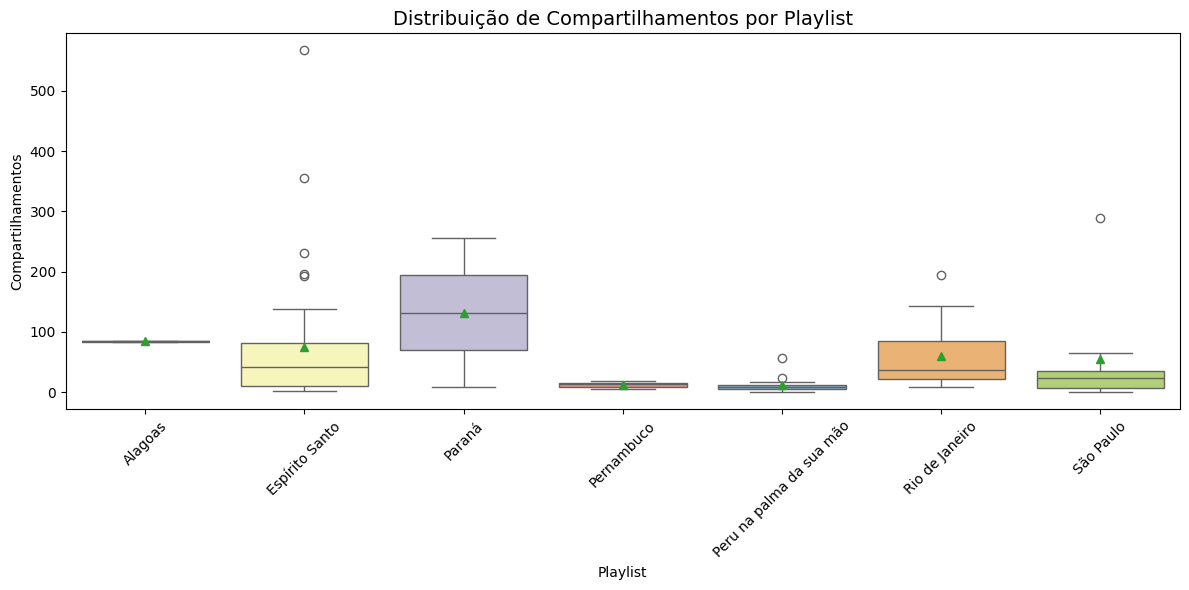

,playlist,content_name,avg_view_duration,shares
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,255
3,Espírito Santo,Conheça as MONTANHAS de GUARAPARI | O MELHOR d...,0:04:45,567
4,Alagoas,O que fazer em Milagres | O MELHOR da Rota Eco...,0:09:22,85
9,Rio de Janeiro,O que fazer em Arraial do Cabo | Quadriciclo n...,0:03:55,194
12,Peru na palma da sua mão,ONDE COMER em CUSCO PERU | Os Melhores Restaur...,0:06:07,57
14,São Paulo,O MELHOR Parque de Trampolim de São Paulo | Im...,0:02:12,289
25,Pernambuco,Praia dos Carneiros | A PRAIA MAIS BONITA do B...,0:11:08,18


In [126]:
# 🔗 Compartilhamentos por playlist

# 📊 Calcula soma, média, mediana, máximo e desvio padrão por playlist
shares_stats = (
    stg__gastronomades
    .groupby('playlist')['shares']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Compartilhamentos por Playlist:\n")
print(shares_stats)

# 📈 Gráfico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='shares',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição de Compartilhamentos por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Compartilhamentos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 👀 Exibe vídeos com valores altos de Compartilhamentos (ajuste conforme o seu dataset)
stg__gastronomades[
    stg__gastronomades['shares'].isin([567,289,255,194,85,57,18])  # Exemplo de outliers, ajuste conforme o seu
][['playlist','content_name','avg_view_duration','shares']]


Interpretação: O ES se destaca com maior número de compartilhamentos, seguido de Rio de Janeiro
<br><br><br>
Destaques:
- O vídeo com maior número de compartilhamentos do ES é o antigo da Rota da Ferradura (outlier)
- O vídeo com maior número de compartilhamentos do RJ é o antigo de Arraial do Cabo (outlier)



/tmp/ipython-input-127-4204522993.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['avg_view_duration__ss']
/tmp/ipython-input-127-4204522993.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Tempo Médio de Visualização (segundos) por Playlist:

                   playlist   mean  median  max    std
0                   Alagoas  622.5   622.5  683   85.6
3                Pernambuco  570.7   555.0  668   90.5
2                    Paraná  504.5   504.5  602  137.9
4  Peru na palma da sua mão  313.9   321.0  644  144.6
5            Rio de Janeiro  269.2   253.5  546  103.2
1            Espírito Santo  241.0   209.0  613  124.2
6                 São Paulo  216.6   128.0  873  268.3


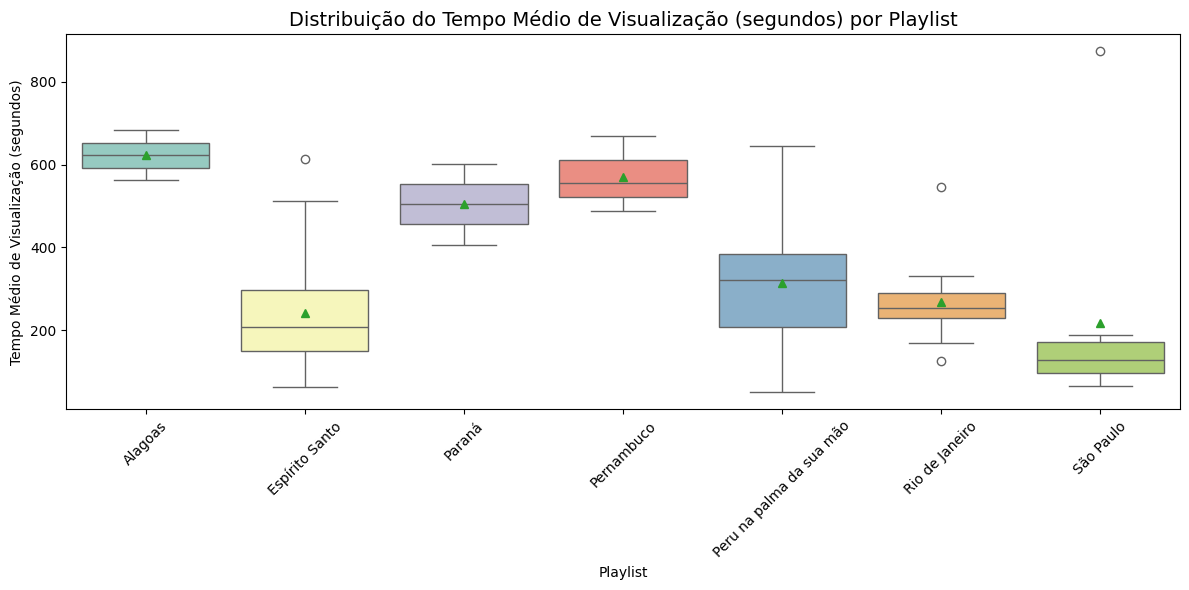

,playlist,content_name,avg_view_duration,view_ratio
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,28.4
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,33.4
18,São Paulo,O que fazer em ILHABELA | O melhor destino do ...,0:14:33,28.7
21,Espírito Santo,Descubra MARECHAL FLORIANO | Um pedacinho da E...,0:10:13,27.6
25,Pernambuco,Praia dos Carneiros | A PRAIA MAIS BONITA do B...,0:11:08,39.4
26,Rio de Janeiro,ROTEIRO COMPLETO DE 03 DIAS EM BÚZIOS - RJ,0:09:06,13.2
41,Peru na palma da sua mão,Descubra como chegar em MACHU PICCHU | A cidad...,0:10:44,31.4


In [127]:
# ⏱️ Tempo Médio de Visualização (segundos) por Playlist

# 📊 Calcula soma, média, mediana, máximo e desvio padrão por playlist
avg_view_duration_ss_stats = (
    stg__gastronomades
    .groupby('playlist')['avg_view_duration__ss']
    .agg(['mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estatísticas de Tempo Médio de Visualização (segundos) por Playlist:\n")
print(avg_view_duration_ss_stats)

# 📈 Gráfico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='avg_view_duration__ss',
    palette='Set3',
    showmeans=True
)

plt.title('Distribuição do Tempo Médio de Visualização (segundos) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Tempo Médio de Visualização (segundos)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 👀 Exibe vídeos com valores altos de tempo médio de visualização e a razão do tempo médio sobre o total do vídeo
(
    stg__gastronomades.loc[
        stg__gastronomades['avg_view_duration__ss'].isin([683, 668, 602, 644, 546, 613, 873]),
        ['playlist', 'content_name', 'avg_view_duration', 'avg_view_duration__ss', 'duration__ss']
    ]
    .assign(
        view_ratio = lambda df: round(df['avg_view_duration__ss'] / df['duration__ss'] * 100, 1)
    )
    [['playlist', 'content_name', 'avg_view_duration', 'view_ratio']]
)


Interpretação: O gráfico evidencia que o tempo médio de visualização é consideravelmente maior nos estados de Alagoas, Paraná e Pernambuco. Essas playlists, apesar de terem poucos vídeos, são praticamente os vídeos mais recentes do canal. Até temos recentes no ES, mas pelo visto não estão tendo bom tempo de visualização. O ES tem o segundo pior tempo médio de visualização entre todas as playlists, perde apenas para SP que tem vídeos curtos.
<br><br><br>
Destaques:
- O vídeo com maior tempo de visualização do canal é de Ilhabela, com mais de 14 minutos. Vale lembrar que esse vídeo é longo, tem 50 minutos;
- O segundo vídeo com mais tempo de visualização do canal é de Maragogi, seguido do vídeo de Carneiros, com quase 40% de média de view, porém não tem dado view.
- Marechal Floriano se destaca no ES com maior tempo de visualização, um vídeo de mais de 30 minutos



### Playlist vs Métricas de receita

/tmp/ipython-input-128-3118544503.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['estimated_revenue_usd']
/tmp/ipython-input-128-3118544503.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de Receita Estimada por Playlist:

                   playlist      sum     mean   median     max      std
2                    Paraná   53.496  26.7480  26.7480  52.735  36.7512
0                   Alagoas   37.263  18.6315  18.6315  20.755   3.0031
5            Rio de Janeiro   56.747   5.1588   3.3190  19.324   5.9782
1            Espírito Santo  127.721   3.1151   1.4660  21.400   4.2709
6                 São Paulo   19.019   2.7170   1.2610  11.600   4.0561
3                Pernambuco    6.562   2.1873   1.4660   4.067   1.6424
4  Peru na palma da sua mão   30.345   2.0230   0.9140   9.482   2.8387


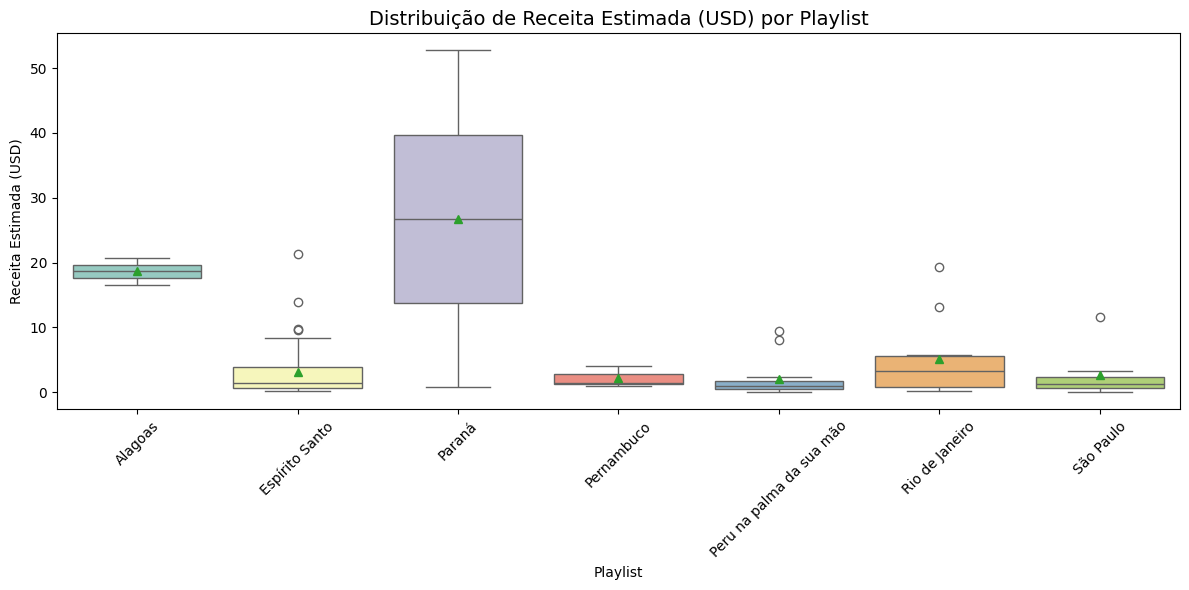

,playlist,content_name,avg_view_duration,estimated_revenue_usd
0,Paraná,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,0:10:02,52.735
1,Alagoas,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,0:11:23,20.755
3,Espírito Santo,Conheça as MONTANHAS de GUARAPARI | O MELHOR d...,0:04:45,21.400
7,Rio de Janeiro,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,0:02:07,19.324
12,Peru na palma da sua mão,ONDE COMER em CUSCO PERU | Os Melhores Restaur...,0:06:07,9.482
14,São Paulo,O MELHOR Parque de Trampolim de São Paulo | Im...,0:02:12,11.600
19,Pernambuco,Descubra PORTO de GALINHAS | O VILAREJO mais i...,0:09:15,4.067


In [128]:
# Estatísticas de Receita Estimada por Playlist
revenue_stats = (
    stg__gastronomades
    .groupby('playlist')['estimated_revenue_usd']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(4)
)

print("Estatísticas de Receita Estimada por Playlist:\n")
print(revenue_stats)

# Boxplot Receita Estimada
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='estimated_revenue_usd',
    palette='Set3',
    showmeans=True
)
plt.title('Distribuição de Receita Estimada (USD) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Receita Estimada (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe vídeos com valores mais altos de Receita Estimada (substitua conforme seus dados)
stg__gastronomades[
    stg__gastronomades['estimated_revenue_usd'].isin([52.735,20.755,19.324,21.400,11.600,4.067,9.482])  # troque pelos maiores do seu dataset
][['playlist','content_name','avg_view_duration','estimated_revenue_usd']]


Interpretação: ES lidera o ranking de receita acumulada, porém em virtude do volume de vídeos.
<br><br><br>
Destaques:
- O vídeo do ES que mais deu retorno financeiro foi o antigo da Rota da Ferradura
- Como esperado, o vídeo de Gastronomia de Curitiba foi o que mais trouxe receita para o canal.


/tmp/ipython-input-129-1230540721.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['rpm_usd']
/tmp/ipython-input-129-1230540721.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estatísticas de RPM por Playlist:

                   playlist    mean  median    max     std
0                   Alagoas  2.1240  2.1240  2.384  0.3677
3                Pernambuco  1.7490  1.7290  1.885  0.1272
2                    Paraná  1.6655  1.6655  1.673  0.0106
4  Peru na palma da sua mão  1.6454  1.9960  2.741  0.8421
1            Espírito Santo  1.1285  1.0600  3.707  0.6447
5            Rio de Janeiro  1.0593  0.8570  2.273  0.7237
6                 São Paulo  0.9547  0.6540  2.336  0.6628


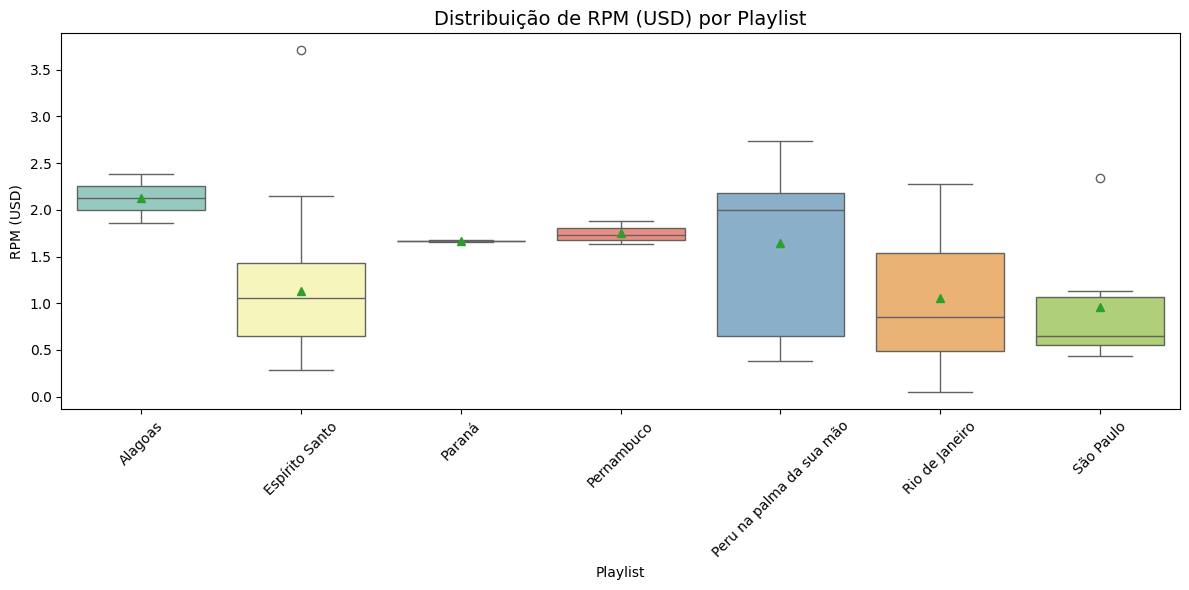

,playlist,content_name,avg_view_duration,rpm_usd
4,Alagoas,O que fazer em Milagres | O MELHOR da Rota Eco...,0:09:22,2.384
18,São Paulo,O que fazer em ILHABELA | O melhor destino do ...,0:14:33,2.336
19,Pernambuco,Descubra PORTO de GALINHAS | O VILAREJO mais i...,0:09:15,1.885
21,Espírito Santo,Descubra MARECHAL FLORIANO | Um pedacinho da E...,0:10:13,3.707
36,Rio de Janeiro,Onde se HOSPEDAR na ORLA BARDOT | Roteiros de ...,0:03:34,2.273
72,Peru na palma da sua mão,Como são os FAST FOODS peruanos | Mc Donald's ...,0:05:21,2.741


In [129]:
# Estatísticas de RPM por Playlist
rpm_stats = (
    stg__gastronomades
    .groupby('playlist')['rpm_usd']
    .agg(['mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(4)
)

print("Estatísticas de RPM por Playlist:\n")
print(rpm_stats)

# Boxplot RPM
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='rpm_usd',
    palette='Set3',
    showmeans=True
)
plt.title('Distribuição de RPM (USD) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('RPM (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe vídeos com valores mais altos de RPM (substitua conforme seus dados)
stg__gastronomades[
    stg__gastronomades['rpm_usd'].isin([2.384,3.707,2.273,2.336,2.741,1,673,1.885,2.384])  # troque pelos maiores do seu dataset
][['playlist','content_name','avg_view_duration','rpm_usd']]


Interpretação: O RPM médio entre vídeos do canal é mais alto para a playlist de Alagoas, seguido de Pernambuco e Paraná.

Destaques:
- O vídeo com maior RPM do canal é Marechal Floriano, seguido de Milagres e Ilhabela.


                                         content_name  \
21  Descubra MARECHAL FLORIANO | Um pedacinho da E...   
72  Como são os FAST FOODS peruanos | Mc Donald's ...   
44  O QUE FAZER em CUSCO e Região | Descubra os MA...   
13  O que comer em CUSCO PERU | Comida de Rua e Su...   
4   O que fazer em Milagres | O MELHOR da Rota Eco...   
18  O que fazer em ILHABELA | O melhor destino do ...   
36  Onde se HOSPEDAR na ORLA BARDOT | Roteiros de ...   
58  ONDE SE HOSPEDAR  em CUSCO Peru | Descubra um ...   
30  CONDOMÍNIO VISTA AZUL + HOSPEDAGEM EM PEDRA AZ...   
12  ONDE COMER em CUSCO PERU | Os Melhores Restaur...   

                    playlist  rpm_usd  
21            Espírito Santo    3.707  
72  Peru na palma da sua mão    2.741  
44  Peru na palma da sua mão    2.512  
13  Peru na palma da sua mão    2.405  
4                    Alagoas    2.384  
18                 São Paulo    2.336  
36            Rio de Janeiro    2.273  
58  Peru na palma da sua mão    2.217  
30          

/tmp/ipython-input-130-3247018847.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


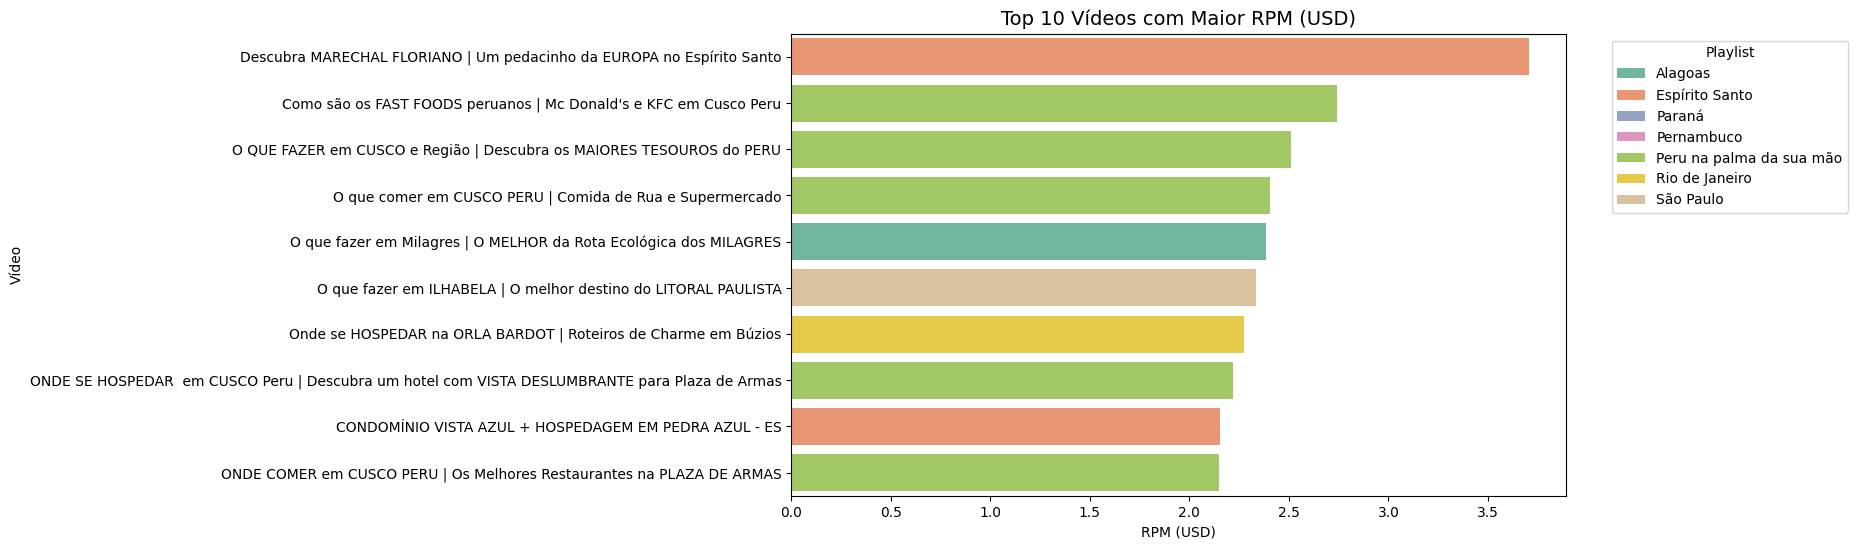

In [130]:
# Cria um dataframe com os top 10 vídeos com maior RPM
top_rpm_videos = (
    stg__gastronomades
    [['content_name', 'playlist', 'rpm_usd']]
    .sort_values(by='rpm_usd', ascending=False)
    .head(10)  # Mude para 5 se quiser top 5
)

# Exibe o dataframe (opcional)
print(top_rpm_videos)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_rpm_videos,
    x='rpm_usd',
    y='content_name',
    hue='playlist',
    dodge=False,
    palette='Set2'
)

plt.title('Top 10 Vídeos com Maior RPM (USD)', fontsize=14)
plt.xlabel('RPM (USD)')
plt.ylabel('Vídeo')
plt.legend(title='Playlist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Interpretação: 5 dos 10 vídeos do top 10 com maior RPM são do Peru, algo que não tinhamos ideia. Será que pode ter a ver com o fato de ser um conteúdo estrangeiro em português??

### Correlação

Matriz de Correlação:

                        watch_time__hh  duration__ss  impressions  views  \
watch_time__hh                    1.00          0.33         0.95   0.86   
duration__ss                      0.33          1.00         0.26   0.16   
impressions                       0.95          0.26         1.00   0.90   
views                             0.86          0.16         0.90   1.00   
click_through_rate_pct            0.00         -0.36        -0.01   0.22   
subscribers                       0.95          0.24         0.95   0.92   
gained_subscribers                0.95          0.24         0.95   0.93   
lost_subscribers                  0.80          0.21         0.85   0.83   
likes                             0.91          0.23         0.90   0.93   
dislikes                          0.76          0.14         0.81   0.89   
like_vs_dislike_rate             -0.16          0.02        -0.21  -0.33   
comments                          0.51          0.17         0.51

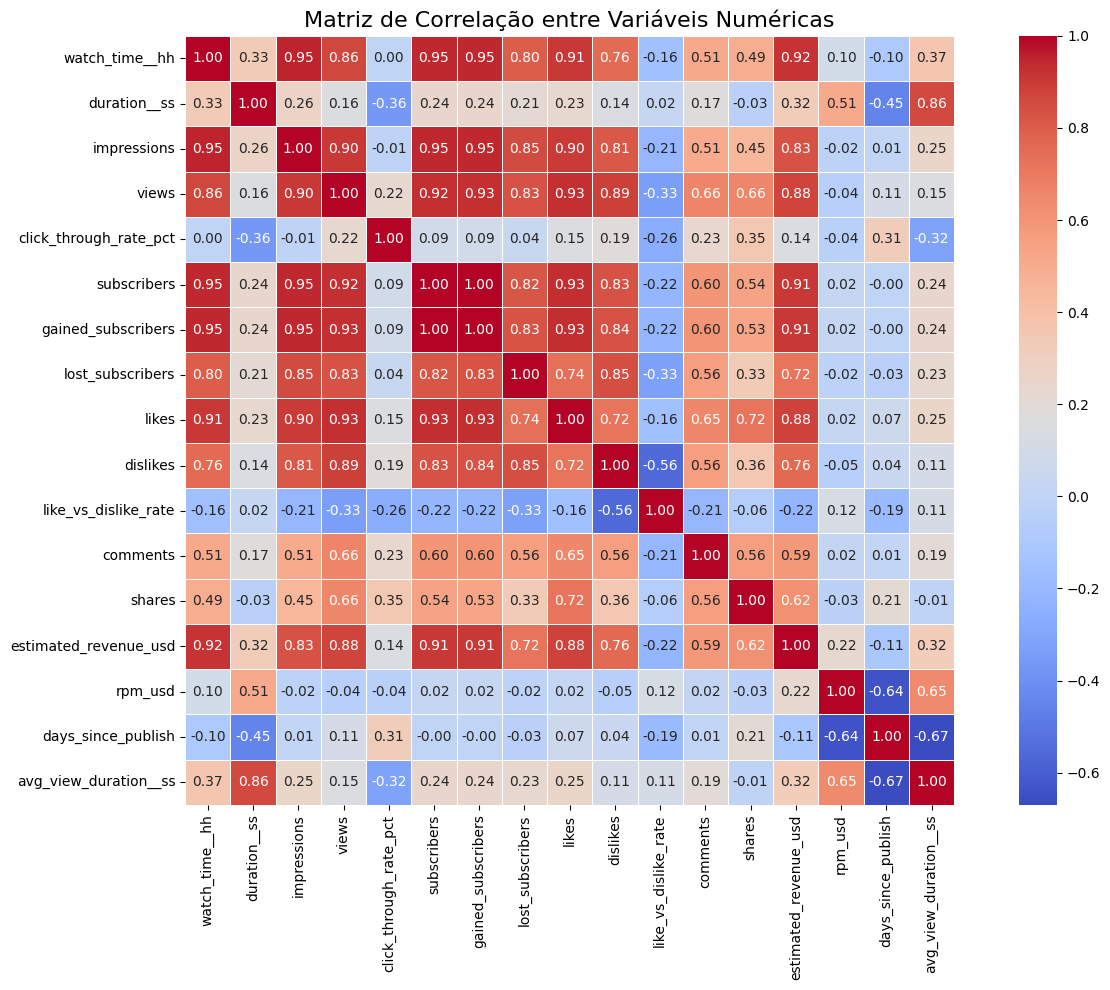

In [131]:
# Filtra apenas as colunas numéricas
stg__gastronomades_numeric = stg__gastronomades.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
corr_matrix = stg__gastronomades_numeric.corr()

# Exibe a matriz de correlação
print("Matriz de Correlação:\n")
print(corr_matrix.round(2))

# Cria o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,      # mostra os valores dentro das células
    fmt=".2f",       # casas decimais
    cmap='coolwarm', # paleta de cores
    square=True,
    linewidths=0.5
)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()


Destaques:

- watch_time__hh: o total de horas de visualização tem associação com praticamente todas as métricas (positivo)
- duration_ss: associação forte com avg_view_duration__ss
- Quanto mais longo o vídeo, maior o tempo médio de visualização (0,86)
- Quanto mais impressões/views, mais views e horas totais de visualização, consequentemente, mais engajamento (inscritos, likes, compatilhamentos) e receita estimada
- Quanto mais inscritos, maior engajamento e maior receita
- Comentários tem uma associação mediana com likes
- A receita estimada tem associação com as métricas de alcance e engajamento


Falta de associação:
- A taxa de cliques não tem associação significativa com nenhuma variável, o que faz sentido, pois normalmente está associado ao título e à thumb
- Comentários não tem associação significativa com nada
- RPM não tem associação significativa com nenhuma variável

✅ Conclusão prática
Essa leitura reforça hipóteses de clusterização:

Métricas de alcance, engajamento e receita podem formar agrupamentos de vídeos de alta performance.

A taxa de cliques e o RPM podem precisar de análise separada, pois fogem do padrão geral.

# ML
A ideia desta seção é aplicar um modelo de aprendizado não supervisionado para agrupar os dados de alguma forma. Inicialmente, a proposta é classificar os vídeos em bons, medianos e ruins com base nas métricas. Mas antes de aplicarmos alguma modelagem, vamos avaliar multicolinearidade e possibilidade de análise fatorial.


## Multicolinearidade
Analisaremos aqui a possibilidade das variáveis estarem fortemente correlacionadas entre si.

In [133]:
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleciona colunas numéricas
X = stg__gastronomades.select_dtypes(include=['int64', 'float64'])

# Remove linhas com NaN ou Inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Adiciona constante
X = add_constant(X)

# Calcula VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Ordena do maior para o menor
vif_data.sort_values(by='VIF', ascending=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
8,lost_subscribers,inf
7,gained_subscribers,inf
6,subscribers,inf
0,const,4862.141543
1,watch_time__hh,67.778097
4,views,60.166058
3,impressions,53.121637
14,estimated_revenue_usd,34.356085
9,likes,32.966751
10,dislikes,19.247298


Interpretação: O resultado mostra que algumas variáveis apresentam alta multicolinearidade, ou seja, estão muito correlacionadas entre si, o que pode prejudicar a análise e o desempenho do modelo.

Por outro lado, há um grupo de variáveis que apresentam valores baixos de VIF, indicando que são menos correlacionadas e trazem informações mais independentes para a análise.
<br> </br>
Variáveis com VIF aceitável (menor que ~5):
- rpm_usd: VIF ≈ 3.44
- days_since_publish: VIF ≈ 3.06
- comments: VIF ≈ 2.50
- like_vs_dislike_rate: VIF ≈ 2.45
- click_through_rate_pct: VIF ≈ 1.91

## Normalização/Padronização
Como os dados estão muito correlacionados, optamos por normalização para que ambos fiquem na mesma escala, com média 0 e variância 1. A ideia é eliminar um possível viés nas etapas futuras que faremos.

In [134]:
from sklearn.preprocessing import StandardScaler

# Seleciona as colunas numéricas do dataframe original e remove linhas com missing
X_num = stg__gastronomades_numeric.dropna()

# Inicializa o scaler
scaler = StandardScaler()

# Aplica padronização (média 0, variância 1)
X_num_scaled = scaler.fit_transform(X_num)

# Cria um dataframe novo, mantendo os nomes das colunas
stg__gastronomades_scaled = pd.DataFrame(X_num_scaled, columns=numeric_columns, index=X_num.index)

# Visualiza as primeiras linhas do dataframe padronizado
stg__gastronomades_scaled.head()


,watch_time__hh,duration__ss,impressions,views,click_through_rate_pct,subscribers,gained_subscribers,lost_subscribers,likes,dislikes,like_vs_dislike_rate,comments,shares,estimated_revenue_usd,rpm_usd,days_since_publish,avg_view_duration__ss
0,7.524825,2.257998,7.165860,5.442927,-0.930428,7.282464,7.273347,5.617402,5.913892,5.455655,-0.692372,1.939436,2.150959,6.713517,0.557426,-1.130012,1.948410
1,2.725226,2.115289,1.492225,1.492682,-0.298791,0.970020,1.003193,2.157253,1.540190,0.977653,-0.291155,1.939436,0.245984,2.300097,0.846391,-1.478752,2.444414
2,1.779992,1.041314,3.279702,2.462225,-0.751999,1.680978,1.720989,3.022290,2.027090,2.391759,-0.881958,0.846986,0.323512,-0.454219,-1.699588,1.583266,0.282815
3,1.174742,-0.100357,0.256290,1.972783,0.900249,1.207006,1.193198,0.427179,2.102643,0.977653,-0.105979,2.157926,5.606496,2.389111,0.418554,0.172975,0.007257
4,1.170849,1.553602,0.678305,0.682346,-0.259536,1.314727,1.277645,-0.437858,1.128844,0.034916,0.264375,1.502456,0.268135,1.713987,1.575818,-1.398274,1.703469


## Redução de dimensionalidade
Utilizaremos a técnica de Análise de Componentes Principais (PCA) para reduzir o número de variáveis a serem utilizadas futuramente em um modelo. Essa é uma abordagem que visa solucionar o problema de multicolinearidade dos dados visto anteriormente.

Variância explicada por cada componente:
 [5.30444486e-01 1.92329418e-01 7.30524719e-02 6.72133995e-02
 3.77679626e-02 2.64140916e-02 2.39303917e-02 1.50998444e-02
 1.21187333e-02 6.63876043e-03 5.20416003e-03 3.52325151e-03
 3.09154480e-03 1.56541317e-03 1.26579822e-03 3.40273192e-04
 3.21845952e-34]

Variância explicada acumulada:
 [0.53044449 0.7227739  0.79582638 0.86303978 0.90080774 0.92722183
 0.95115222 0.96625207 0.9783708  0.98500956 0.99021372 0.99373697
 0.99682852 0.99839393 0.99965973 1.         1.        ]


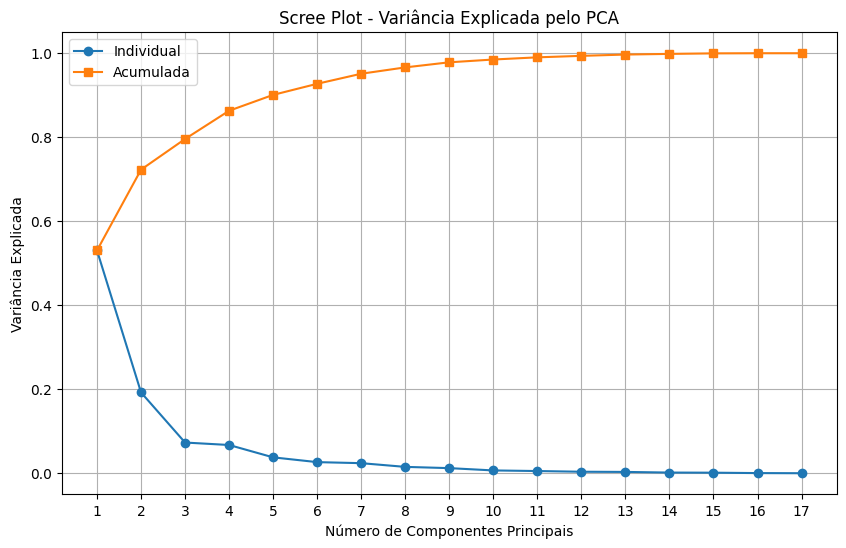

In [135]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Inicializa o PCA: aqui não limitamos o número de componentes para ver tudo
pca = PCA()
X_pca = pca.fit_transform(stg__gastronomades_scaled)

# 2️⃣ Variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por cada componente:\n", explained_variance_ratio)

# 3️⃣ Variância acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVariância explicada acumulada:\n", cumulative_variance)

# 4️⃣ Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Acumulada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.title('Scree Plot - Variância Explicada pelo PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.legend()
plt.grid(True)
plt.show()


Interpretação: Como há muitas variáveis no conjunto de dados e muitas delas estão altamente correlacionadas, entendemos que seria viável aplicar um método de redução de dimensionalidade, a fim de "resumir" o conjunto de dados.
<br> </br>
Aplicamos a análise de componentes principais e observamos que com 4 componentes principais conseguimos explicar mais de 86%. Porém, antes de seguirmos os próximos passos, precisamos entender quais variáveis do conjunto de dados ajudam mais a construir cada componente.


In [136]:
# Cada linha é um componente principal
# Cada coluna é uma variável original
loadings = pca.components_

print(loadings.shape)  # Confirma formato (n_components, n_features)

# Cria DataFrame com os nomes das variáveis
loadings_df = pd.DataFrame(
    loadings,
    columns=numeric_columns  # Suas variáveis originais
)

# Indexa como PC1, PC2, PC3...
loadings_df.index = [f'PC{i+1}' for i in range(loadings_df.shape[0])]


#visualiza
loadings_df.head(4)



(17, 17)


,watch_time__hh,duration__ss,impressions,views,click_through_rate_pct,subscribers,gained_subscribers,lost_subscribers,likes,dislikes,like_vs_dislike_rate,comments,shares,estimated_revenue_usd,rpm_usd,days_since_publish,avg_view_duration__ss
PC1,0.314925,0.121460,0.313451,0.321053,0.038058,0.323545,0.324048,0.286784,0.315957,0.288653,-0.097441,0.226189,0.200150,0.309844,0.024666,-0.004519,0.104228
PC2,0.063311,0.452800,0.001876,-0.096139,-0.297816,-0.013351,-0.013373,-0.011893,-0.032296,-0.092467,0.180279,-0.045295,-0.154968,0.036832,0.400463,-0.472047,0.489702
PC3,-0.068483,-0.039396,-0.181704,0.017805,0.497648,-0.054853,-0.059914,-0.252502,0.127776,-0.226933,0.280955,0.251858,0.526807,0.135365,0.361958,-0.018745,0.070760
PC4,0.133544,-0.054322,0.136789,-0.008791,-0.412018,0.097114,0.093443,-0.070523,0.167952,-0.275233,0.709465,-0.095976,0.172717,-0.006088,-0.305317,0.145443,-0.082334


**PC1:**<br>
- watch_time__hh (0.31)
- impressions (0.31)
- views (0.32)
- subscribers (0.32)
- gained_subscribers (0.32)
- likes (0.31)
- estimated_revenue_usd (0.31)
- outros: lost_subscribers (0.29), dislikes (0.29)
<br><br>

Interpretação: O PC1 tem pesos fortes e consistentes em alcance, engajamento geral e receita estimada. É um componente de performance geral → quanto maior, mais bem-sucedido é o vídeo em tudo.
<br><br>

**PC2:**<br>
- duration__ss (0.45)
- avg_view_duration__ss (0.49)
- rpm_usd (0.40)
- days_since_publish (-0.47)
- click_through_rate_pct (-0.30)
<br><br>

Interpretação: O PC2 separa vídeos longos e com alta retenção média. O RPM também pesa positivamente → indica vídeos de conteúdo mais longo que retêm público e são mais rentáveis por mil views, mas não necessariamente com alto alcance. A relação negativa com days_since_publish sugere que vídeos mais recentes tendem a ter essas características, o que reflete as melhorias realizadas nos últimos vídeos do canal.
<br><br>

**PC3:**<br>
- shares (0.53)
- click_through_rate_pct (0.50)
- like_vs_dislike_rate (0.28)
- comments (0.25)
- rpm_usd (0.36)
- impressions (-0.18)
- lost_subscribers (-0.25)
- dislikes (-0.22)
<br><br>

Interpretação: O PC3 destaca métricas de engajamento ativo → compartilhamentos, CTR, comentários, qualidade de likes vs dislikes. É um sinal de vídeos que geram interação espontânea e são bem recebidos pelo público → podem ter alto engajamento relativo, mesmo sem ter grande alcance.
<br><br>

**PC4:**<br>
- like_vs_dislike_rate (0.71)
- click_through_rate_pct (-0.41)
- dislikes (-0.27)
- rpm_usd (-0.31)
<br><br>

Interpretação: O PC4  parece ser um fator qualitativo:

- like_vs_dislike_rate muito forte positivo indica vídeos com ótima aceitação relativa.
- click_through_rate_pct negativo mostra que mesmo vídeos pouco clicados podem ser bem avaliados por quem clica.
- rpm_usd negativo sugere que vídeos bem avaliados não necessariamente têm alta receita por mil views.
<br><br>

Portanto, o resumo das componentes é:

- PC1: Performance Geral — alcance, engajamento e receita se movem juntos (Alcance & Receita)
- PC2: Conteúdo Longo de Retenção Alta — vídeos longos, com boa retenção e RPM	(Retenção & Qualidade)
- PC3	Engajamento Ativo — vídeos que as pessoas comentam, compartilham e têm boa CTR	(Engajamento Qualitativo)
- PC4: Reação Positiva Relativa — vídeos com ótima taxa de likes, poucos dislikes, mas RPM e CTR menores (Aceitação & Sentimento)
<br><br>

A partir disso, podemos ter as seguintes estratégias de conteúdo:
<br>

**PC1**
- Alto: Tudo performa bem (alcance + receita + engajamento)
- Baixo:  indica vídeos com baixo alcance e baixo engajamento e receita. Vídeo com pouco valor geral. Ação: Evitar repetir formatos/temas que não performam bem em NENHUMA dimensão. Tentar analisar o que eles têm em comum: tema não relevante? falta de otimização SEO? horário ruim? Dica: Usar esses vídeos como benchmark negativo, serve pra aprender o que NÃO priorizar.

<br>

**PC2**
- Alto: Longo com retenção alta, monetiza bem
- Baixo: 	Indica vídeos longos mas com baixa retenção média, ou vídeos curtos que não engajam. Roteiro ruim, abandona cedo. Se o vídeo é longo mas ninguém assiste até o fim, vale revisar roteiro, dinâmica, cortes. Talvez dividir em partes menores. Se é curto e ainda assim tem baixa retenção, pode ser problema de gancho inicial. Dica: Ver pontos de abandono no YouTube Analytics.

<br>

**PC3**
- Alto: Gera discussão, compartilhamento
- Baixo: Indica  poucos comentários, compartilhamentos e CTR fraco. Público passivo, engaja pouco. Reforçar chamadas à ação, incentivar comentários e compartilhamentos. Revise se o conteúdo gera emoção ou discussão. Pode ser conteúdo mais “neutro”, informativo demais, sem pergunta provocativa. Dica: Usar prompts diretos: “Você já passou por isso? Comente!” ou “Compartilhe com quem vai amar isso!”.

<br>

**PC4**
- Alto: Aceito e bem avaliado
- Baixo: Indica mais dislikes, baixa relação like/dislike, CTR desalinhado.. Mais rejeição, crítica, expectativa não entregue. Verificar comentários negativos, possíveis polêmicas ou expectativas não atendidas. Título e thumb podem gerar cliques “enganados”, gerando dislikes. Dica: comparar vídeos de PC4 alto e baixo para ver quais promessas estão sendo mal entregues.


In [137]:
# Constrói o dataframe com as componentes
pcs_df = pd.DataFrame(
    X_pca[:, :4],
    columns=[
        'pc1__Overall_Performance',
        'pc2__Retention_and_Quality',
        'pc3__Active_Engagement',
        'pc4__Audience_Sentiment'
    ]
)

pcs_df['content_id'] = stg__gastronomades.loc[X_num.index, 'content_id'].values
pcs_df['content_name'] = stg__gastronomades.loc[X_num.index, 'content_name'].values
pcs_df['playlist'] = stg__gastronomades.loc[X_num.index, 'playlist'].values

# Reorganiza colunas
cols = ['content_id', 'content_name', 'playlist'] + list(pcs_df.columns[:-3])
pcs_df = pcs_df[cols]

pcs_df.head(5)


,content_id,content_name,playlist,pc1__Overall_Performance,pc2__Retention_and_Quality,pc3__Active_Engagement,pc4__Audience_Sentiment
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,Paraná,19.608379,1.721382,-2.311862,1.838657
1,R5zvHCL4uv4,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,Alagoas,5.588484,3.026738,0.008329,-0.450433
2,xKyysw_ic0c,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,Rio de Janeiro,5.958046,-1.344164,-2.881835,0.788576
3,3AQPokDhg_A,Conheça as MONTANHAS de GUARAPARI | O MELHOR d...,Espírito Santo,5.323076,-1.431978,4.100738,0.660038
4,o6d3z2KSCjk,O que fazer em Milagres | O MELHOR da Rota Eco...,Alagoas,3.181356,2.847933,1.259641,-0.021894


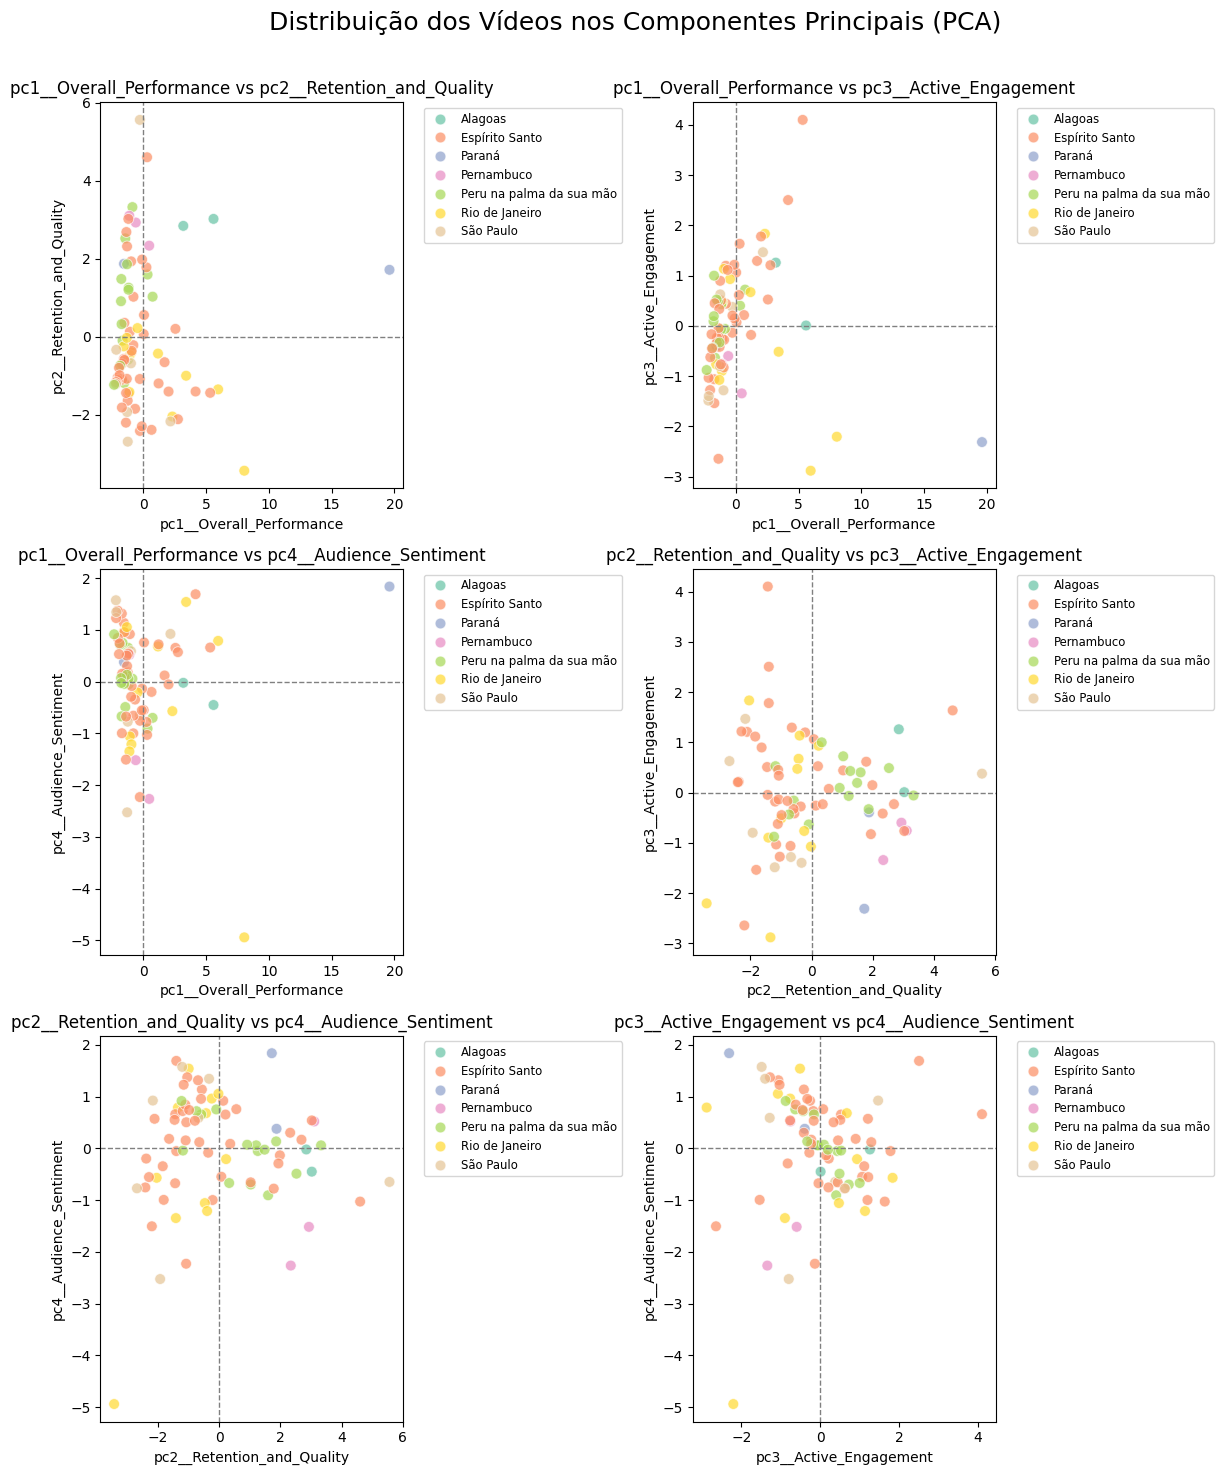

In [138]:
# Para ter cores diferentes por playlist:
hue_col = 'playlist'

# Cria figura 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()  # Para acessar como lista

# Combinações de pares sugeridas
pairs = [
    ('pc1__Overall_Performance', 'pc2__Retention_and_Quality'),
    ('pc1__Overall_Performance', 'pc3__Active_Engagement'),
    ('pc1__Overall_Performance', 'pc4__Audience_Sentiment'),
    ('pc2__Retention_and_Quality', 'pc3__Active_Engagement'),
    ('pc2__Retention_and_Quality', 'pc4__Audience_Sentiment'),
    ('pc3__Active_Engagement', 'pc4__Audience_Sentiment')
]

# Plota cada par
for ax, (x_pc, y_pc) in zip(axes, pairs):
    sns.scatterplot(
        data=pcs_df,
        x=x_pc,
        y=y_pc,
        hue=hue_col,
        palette='Set2',
        ax=ax,
        alpha=0.7,
        s=60
    )
    ax.set_title(f'{x_pc} vs {y_pc}')
    ax.axhline(0, ls='--', lw=1, c='gray')
    ax.axvline(0, ls='--', lw=1, c='gray')

    # Ajusta a legenda: menor e para fora do gráfico
    ax.legend(
        fontsize='small',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

# Ajusta layout geral
plt.suptitle('Distribuição dos Vídeos nos Componentes Principais (PCA)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Interpretação: na combinação de todas as componentes 2x2 os gráficos evidenciam a maioria das playlists que se destacaram nas análises anteriores, mas também algumas outras surpresas que pudemos constatar no quadrante superior direito em cada gráfico.
<br><br>

**PC1 vs PC2**
- (+) Os vídeos provavelmente têm grande alcance, muitos inscritos, alta receita estimada, e o público assiste uma boa parte do vídeo (alta retenção). Conteúdo possivelmente recente e bem otimizado, com bons thumbnails/títulos (RPM alto).
- (-) Pouco alcance, poucos inscritos, baixa receita e engajamento, e o público não assiste muito tempo desses vídeos. Conteúdo possivelmente antigo, com menor apelo, thumbnails/títulos menos atrativos.
<br> <br>

**PC1 vs PC3**
- (+) Vídeos com alta performance geral e alto engajamento ativo do público. Além de ter bom alcance e receita, esses vídeos geram bastante interação real (comentários, compartilhamentos, cliques). Conteúdos virais ou muito apreciados pela comunidade.
- (-) Vídeos com baixo desempenho geral e pouco engajamento. Pouco alcance, poucas interações, baixo impacto geral.
<br> <br>

**PC1 vs PC4**
- (+) Vídeos com alta performance e audiência satisfeita (alta taxa de likes relativos a dislikes). Conteúdo de qualidade e bem recebido, alto alcance e engajamento positivo.
- (-) Vídeos com baixa performance e baixo sentimento da audiência (mais dislikes, menos likes). Pode indicar conteúdos que geram rejeição ou polêmicas, além de pouca visualização.
<br> <br>

**PC2 vs PC3**
- (+) Vídeos que prendem a atenção do público e geram muito engajamento ativo. São vídeos de alta qualidade, que o público assiste bastante e interage bastante (comentários, compartilhamentos).
- (-) Vídeos com baixa retenção e baixo engajamento. Conteúdos que não engajam nem retêm, podem precisar de revisão.
<br> <br>

**PC2 vs PC4**
- (+) Vídeos que mantêm o público engajado e retêm a atenção e são bem avaliados pela audiência. Conteúdo com boa qualidade técnica e emocional.
- (-) Vídeos que têm baixa retenção e são mal recebidos (mais dislikes). Conteúdos possivelmente problemáticos ou pouco interessantes.
<br> <br>

**PC3 vs PC4**
- (+) Vídeos que geram muita interação positiva e têm uma audiência satisfeita.
Conteúdos que engajam e conquistam o público.
- (-) ídeos com pouco engajamento e audiência negativa. Menor potencial viral e pior aceitação.

In [139]:
# Cria um novo dataframe para armazenar os flags das PCs em high e low
pcs_flags_df = pcs_df.copy()

# Para cada PC, cria flag
pcs_flags_df['pc1_flag'] = np.where(pcs_flags_df['pc1__Overall_Performance'] > 0, 'High', 'Low')
pcs_flags_df['pc2_flag'] = np.where(pcs_flags_df['pc2__Retention_and_Quality'] > 0, 'High', 'Low')
pcs_flags_df['pc3_flag'] = np.where(pcs_flags_df['pc3__Active_Engagement'] > 0, 'High', 'Low')
pcs_flags_df['pc4_flag'] = np.where(pcs_flags_df['pc4__Audience_Sentiment'] > 0, 'High', 'Low')

# Organiza as colunas
cols = [
    'content_id', 'content_name', 'playlist',
    'pc1__Overall_Performance', 'pc1_flag',
    'pc2__Retention_and_Quality', 'pc2_flag',
    'pc3__Active_Engagement', 'pc3_flag',
    'pc4__Audience_Sentiment', 'pc4_flag'
]
pcs_flags_df = pcs_flags_df[cols]

# 4️⃣ Visualiza
pcs_flags_df.head(10)


,content_id,content_name,playlist,pc1__Overall_Performance,pc1_flag,pc2__Retention_and_Quality,pc2_flag,pc3__Active_Engagement,pc3_flag,pc4__Audience_Sentiment,pc4_flag
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,Paraná,19.608379,High,1.721382,High,-2.311862,Low,1.838657,High
1,R5zvHCL4uv4,Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...,Alagoas,5.588484,High,3.026738,High,0.008329,High,-0.450433,Low
2,xKyysw_ic0c,ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS,Rio de Janeiro,5.958046,High,-1.344164,Low,-2.881835,Low,0.788576,High
3,3AQPokDhg_A,Conheça as MONTANHAS de GUARAPARI | O MELHOR d...,Espírito Santo,5.323076,High,-1.431978,Low,4.100738,High,0.660038,High
4,o6d3z2KSCjk,O que fazer em Milagres | O MELHOR da Rota Eco...,Alagoas,3.181356,High,2.847933,High,1.259641,High,-0.021894,Low
5,HmfwzdxYS5c,O que fazer em SANTA TERESA | O MELHOR do Circ...,Espírito Santo,4.159255,High,-1.398430,Low,2.505193,High,1.690348,High
6,JBeFwPHoij8,POUSADA VISTA TURQUESA ARRAIAL DO CABO,Rio de Janeiro,3.406483,High,-0.994084,Low,-0.514013,Low,1.541051,High
7,vaXN_VANKN0,VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL 😱,Rio de Janeiro,8.040409,High,-3.428829,Low,-2.205045,Low,-4.942175,Low
8,w3QplOzNLqs,O que fazer nas MONTANHAS CAPIXABAS | Roteiro ...,Espírito Santo,2.554487,High,0.207824,High,0.525239,High,0.653378,High
9,cgDTwbcaBB0,O que fazer em Arraial do Cabo | Quadriciclo n...,Rio de Janeiro,2.311147,High,-2.040247,Low,1.834045,High,-0.569342,Low


In [140]:
#Consulta PCs pelo flag
filtered = pcs_flags_df[
    (pcs_flags_df['pc1_flag'] == 'Low') &
    (pcs_flags_df['pc4_flag'] == 'Low')
]

filtered[['content_id', 'content_name', 'playlist']]

,content_id,content_name,playlist
18,221JVBRQNU0,O que fazer em ILHABELA | O melhor destino do ...,São Paulo
25,n41pSaGHWow,Praia dos Carneiros | A PRAIA MAIS BONITA do B...,Pernambuco
26,IdS17O6T7kg,O QUE FAZER em Alfredo Chaves | Descubra a TER...,Espírito Santo
28,hSTwFxGrlS0,Onde se HOSPEDAR em Pedra Azul | O MELHOR hote...,Espírito Santo
29,5rVkH1dhYPo,CONDOMÍNIO VISTA AZUL + HOSPEDAGEM EM PEDRA AZ...,Espírito Santo
31,Qp5hDT1lM3o,POUSADA SENTINELAS DO MAR EM ARRAIAL DO CABO - RJ,Rio de Janeiro
32,0aYDaSOwsGk,Descubra a CACHOEIRA de MATILDE em Alfredo Cha...,Espírito Santo
33,Kl9arTZCtKM,O que fazer na Praia de CAMBURI | O ponto turí...,Espírito Santo
34,n6rHFlTb6OY,GRECO HOTEL EM BÚZIOS - RJ,Rio de Janeiro
35,H5km-VuXwYc,Onde se HOSPEDAR na ORLA BARDOT | Roteiros de ...,Rio de Janeiro


## Clusterização
Utilizaremos uma técnica de agrupamento para tentar classificar os vídeos em grupos.

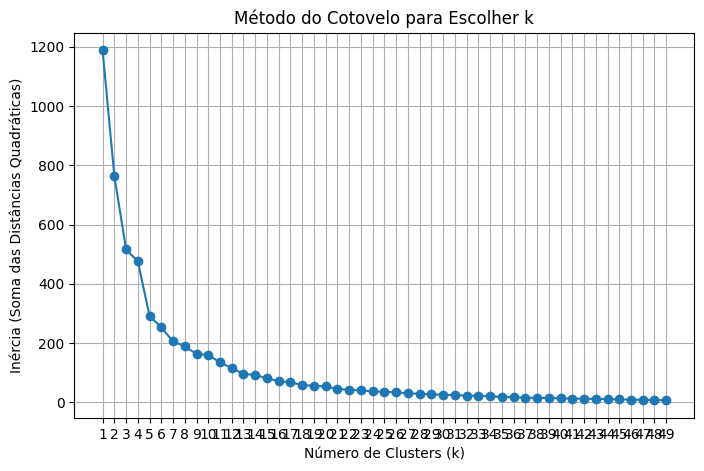

In [141]:
from sklearn.cluster import KMeans

# Vamos usar o dataframe das componentes principais
X_pca = pcs_df[[
    'pc1__Overall_Performance',
    'pc2__Retention_and_Quality',
    'pc3__Active_Engagement',
    'pc4__Audience_Sentiment'
]]

# Lista para guardar as distorções
inertia = []

# Testa k de 1 a 50
K_range = range(1, 50)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma das Distâncias Quadráticas)')
plt.title('Método do Cotovelo para Escolher k')
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [142]:
#Ajusta o kmeans

k_optimal = 5  #k sugerido pelo Elbow Method

# Instancia e treina
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
pcs_df['cluster'] = kmeans_final.fit_predict(X_pca)

# Ver quantos vídeos em cada cluster
print("\nDistribuição de vídeos por cluster:")
print(pcs_df['cluster'].value_counts())



Distribuição de vídeos por cluster:
cluster
3    42
0    23
4    14
2     1
1     1
Name: count, dtype: int64


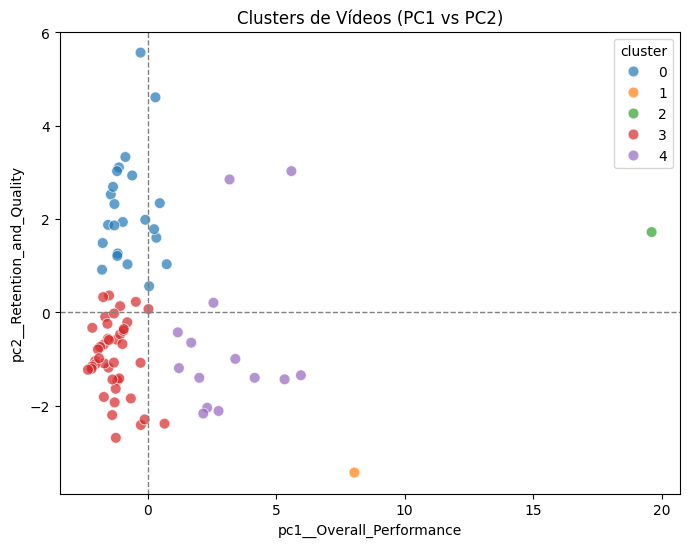

In [143]:
# Par exemplo: PC1 vs PC2 colorindo por cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pcs_df,
    x='pc1__Overall_Performance',
    y='pc2__Retention_and_Quality',
    hue='cluster',
    palette='tab10',
    alpha=0.7,
    s=60
)
plt.axhline(0, ls='--', lw=1, c='gray')
plt.axvline(0, ls='--', lw=1, c='gray')
plt.title('Clusters de Vídeos (PC1 vs PC2)')
plt.show()


In [144]:
pcs_df[pcs_df['cluster'] == 2]

,content_id,content_name,playlist,pc1__Overall_Performance,pc2__Retention_and_Quality,pc3__Active_Engagement,pc4__Audience_Sentiment,cluster
0,ZCFX5pQDs50,O melhor da GASTRONOMIA CURITIBANA | Onde COME...,Paraná,19.608379,1.721382,-2.311862,1.838657,2


Interpretação: Ao escolher 5 grupos, que foi o ponto onde a curva começou a se estabilizar, o algoritmo cria 2 dos 5 grupos com vídeos isolados do canal, são eles:

- Nudismo: já alteramos a visualização dele para privada
- Gastronomia Curitibana: o melhor vídeo do canal

<br>
Parece que nesta abordagem com 5 grupos esses dis vídeos são vistos como outliers. Talvez seja interessante remover esses 2 vídeos do conjunto de dados e refazer tudo.

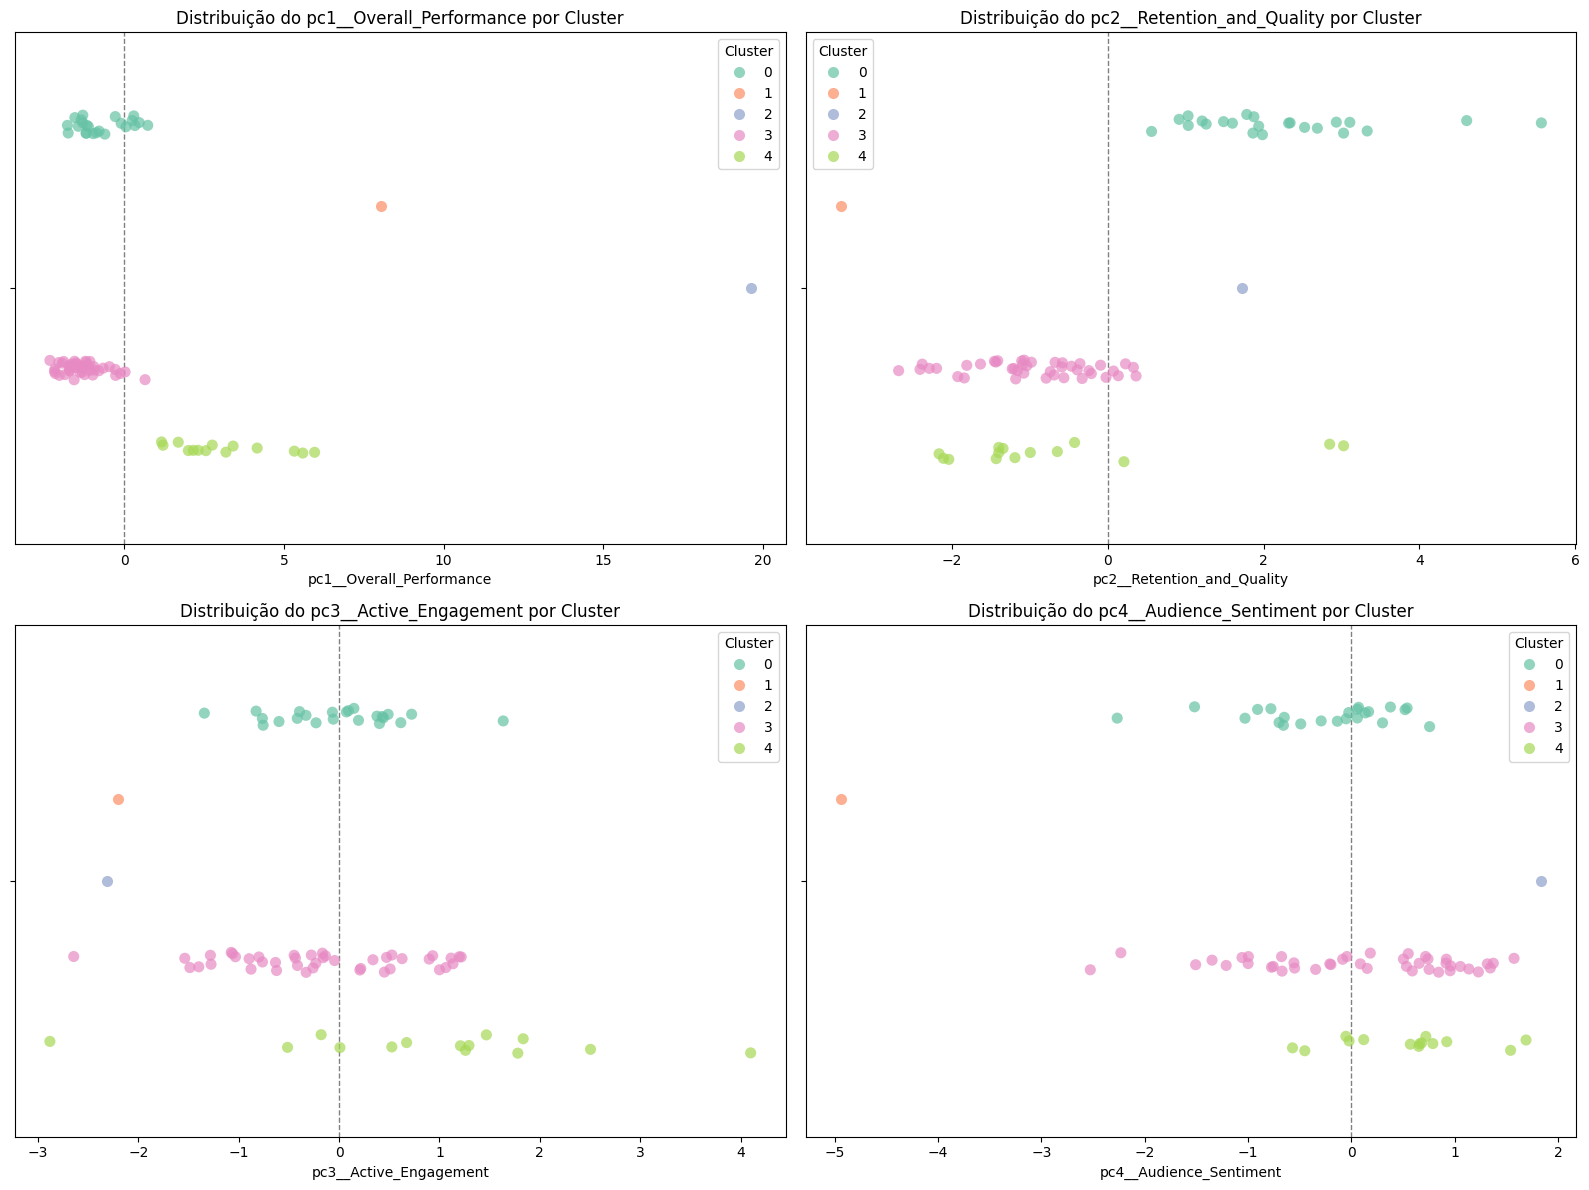

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista com os nomes dos PCs
pcs = [
    'pc1__Overall_Performance',
    'pc2__Retention_and_Quality',
    'pc3__Active_Engagement',
    'pc4__Audience_Sentiment'
]

# Cria subplots: 2 linhas x 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plota cada PC isolado
for ax, pc in zip(axes, pcs):
    sns.stripplot(
        data=pcs_df,
        x=pc,
        y=['']*len(pcs_df),  # 'dummy' para não ter eixo Y
        hue='cluster',
        palette='Set2',
        dodge=True,
        ax=ax,
        size=8,
        alpha=0.7
    )
    ax.set_title(f'Distribuição do {pc} por Cluster')
    ax.axvline(0, ls='--', lw=1, c='gray')  # linha no zero
    ax.set_ylabel('')
    ax.legend(title='Cluster')

# Ajusta layout
plt.tight_layout()
plt.show()


Interpretação: Neste gráfico fica mais clara a necessidade de remover o vídeo da Praia de Nudismo da base, considerando que ele poderia ser mal interpretado pelo modelo. Apesar dele ter views e receita da época que ficou ativo, ele atualmente não está mais sendo exibido no canal, apenas para membros, sem falar que todas as demais métricas dele são ruins. É um vídeo que foge do padrão de vídeos do canal.
<br> <br>

Já o vídeo da Gastronomia Curitibana é um vídeo que deu certo e que tem se destacado no canal, acertamos em vários aspectos, por isso acredito não ser uma boa remove-lo do canal. Ele tem vários itens relevantes. Foi o primeiro vídeo de gastronomia do canal, foi o primeiro vídeo com história do canal, foi o primeiro vídeo depois de um longo tempo estudando outras formas de editar, foi um dos primeiros com qualidade melhor, então é um vídeo que pode contrbuir para as análises e modelagem, diferente do de nudismo que atraiu espectadores que só tinham interesse neste vídeo, acabou viesando o perfil do público. Desde que o removemos do canal, o canal melhorou muito suas métricas e estatísticas em geral.